# Overview: 
## Our purpose is to build a Machine Learning model that can accurately predict future apartment prices in the capital city of Romania.   





# ***Exploratory Data Analysis (EDA)***

After scraping records from a popular real estate website in Romania, the analysis stage may begin. Let us first take a look at the dataset. This set of data contains many features that could impact change in apartment prices. It is fitting to make an attempt at explaining everything starting from the nature of the data, up until positive/negative relations between each existing feature. After clearly understanding how collected data behaves, and making vital changes (cleaning the data where necessary), the creation of a machine learning model can proceed. 

**Why should data be thoroughly inspected before fitting a model to it?** Since the aim of this project is to predict a given feature as accurately as possible, it is only appropriate to ensure the data is a good match for our model.

In [1]:
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder 
from sklearn.preprocessing import OneHotEncoder 
from sklearn.compose import ColumnTransformer 
from sklearn.linear_model import LinearRegression
import xgboost as xgb
from sklearn.svm import SVR
import folium
import json
import scipy.stats as stats
from folium.plugins import FastMarkerCluster
from geopy.geocoders import Nominatim
import re
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.model_selection import train_test_split
warnings.filterwarnings('ignore')

The **pandas library** allows for ideal comprehensive use of data. We shall create a **'DataFrame' object** (a structured way of representing datasets in pandas) and read the 'csv' (comma separated values) file which holds the extracted information. We would also like to see all of the existing columns, and ensure that if we change something in the dataset, we do it on a copy, so as to not negatively affect the true dataset which might prove useful later in time. 

In [2]:
pd.pandas.set_option('display.max_columns', None)
pd.options.display.float_format = '{:.5f}'.format
pd.pandas.set_option('display.max_rows', None)
df = pd.read_csv(r'C:\Users\Calin\Desktop\Personal-Project\WebScraping\apartamente2.csv')
df_copy = df.copy()

Let's look at the size of the dataset. Using one of the many functions that pandas provides, **the exact number of rows and columns is shown.**

In [3]:
df_copy.shape

(9981, 21)

To get a quick glance on the **first 5 values** of the dataframe, pandas comes to aid once again.

In [4]:
df_copy.head()

Unnamed: 0  Nr camere Suprafata utila  Suprafata utila totala  \
0           0    3.00000            131                      nan   
1           1    2.00000             67                 87.00000   
2           2    2.00000             65                 65.00000   
3           3    1.00000             52                 52.00000   
4           4    4.00000            174                      nan   

  Suprafata construita Compartimentare Confort          Etaj  Nr. bucatarii  \
0                  NaN             NaN       1    Parter / 5        1.00000   
1                  NaN        decomand       1    Etaj 2 / 4        1.00000   
2                  65         decomand       1    Etaj 1 / 5        1.00000   
3                  68         decomand     lux  Etaj 10 / 10        1.00000   
4                 207         decomand     lux    Etaj 5 / 5        1.00000   

   Nr. bai         An constructie Structura rezistenta           Tip imobil  \
0  1.00000                   2020                beton  bloc de apartamente   
1  1.00000                   2020                beton  bloc de apartamente   
2  1.00000                   2020                beton  bloc de apartamente   
3  1.00000                   2016                beton  bloc de apartamente   
4  3.00000  2021 (in constructie)                beton  bloc de apartamente   

  Regim inaltime  Nr. garaje Nr. locuri parcare Nr. balcoane  Latitudine  \
0           P+5E         nan                  1          NaN    44.41206   
1           P+4E         nan                  1            2    44.41185   
2           P+5E         nan                NaN  1 (închise)    44.41105   
3        S+P+10E         nan                NaN  1 (închise)    44.40749   
4         D+P+5E         nan                NaN            1    44.48139   

   Longitudine             Zona      Pret  
0     26.01472  Drumul Taberei    75.600   
1     26.01467  Drumul Taberei    35.800   
2     26.01500  Drumul Taberei    42.400   
3     25.98938  Drumul Taberei    43.500   
4     26.09009       Herăstrău   399.888

Should we opt for a different approach to checking records, another pandas function allows for **randomized observations** to appear as a result of a provided number. 

In [5]:
df_copy.sample(50)

Unnamed: 0  Nr camere Suprafata utila  Suprafata utila totala  \
4882        4882    2.00000           76,3                      nan   
7903        7903    3.00000             64                      nan   
6832        6832    3.00000             60                      nan   
6205        6205    2.00000             52                 52.00000   
9868        9868    2.00000             50                      nan   
1069        1069    3.00000             76                 76.00000   
1110        1110    4.00000            170                210.00000   
7848        7848    2.00000             45                      nan   
2653        2653    4.00000            149                      nan   
2087        2087    1.00000             32                 32.00000   
3448        3448    2.00000             58                 58.00000   
6012        6012    4.00000             89                      nan   
153          153    1.00000             33                      nan   
1340        1340    2.00000             67                      nan   
7657        7657    2.00000          49,39                 49.39000   
8850        8850    2.00000             49                      nan   
1820        1820    3.00000             79                      nan   
242          242    3.00000          70,71                      nan   
6696        6696    3.00000             92                      nan   
2187        2187    3.00000            113                      nan   
8898        8898    2.00000             51                      nan   
2405        2405    3.00000             80                      nan   
8923        8923    3.00000            100                      nan   
6258        6258    1.00000             42                      nan   
4705        4705    3.00000             76                      nan   
8892        8892    1.00000             32                      nan   
1164        1164    2.00000             42                 44.00000   
8789        8789    3.00000             58                      nan   
7439        7439    2.00000             47                 47.00000   
1501        1501    2.00000             65                 65.00000   
250          250    2.00000             59                      nan   
6194        6194    3.00000             80                 80.00000   
931          931    2.00000          57,63                 57.63000   
888          888    2.00000             44                 44.00000   
4448        4448    2.00000             48                      nan   
6602        6602    2.00000             97                      nan   
8738        8738    2.00000             38                      nan   
4635        4635    1.00000           34,8                 35.00000   
4414        4414    5.00000             91                      nan   
5267        5267    2.00000             58                      nan   
2896        2896    3.00000            145                      nan   
3157        3157    2.00000             45                      nan   
4965        4965    2.00000             55                 62.00000   
7647        7647    3.00000             69                 69.00000   
5590        5590    2.00000           42,6                 48.20000   
9568        9568    2.00000             48                      nan   
7788        7788    3.00000            130                      nan   
2182        2182    4.00000            250                      nan   
783          783    3.00000             73                      nan   
7369        7369    3.00000            148                155.00000   

     Suprafata construita Compartimentare Confort          Etaj  \
4882                  99         decomand       1  Mansarda / 3   
7903                  64         decomand       1   Etaj 7 / 10   
6832                  69     semidecomand       1    Etaj 6 / 7   
6205                  63         decomand       1    Etaj 1 / 3   
9868                  NaN        decomand     lux

It appears as though the **first column simply shows the position of each row.** This is due to the data being inside of a DataFrame before becoming a 'csv' file. Besides the fact that this type of information is not useful in any way, it may also be detrimental to our model, so dropping the column from the dataframe is how we treat this issue.

In [6]:
df_copy.drop('Unnamed: 0', inplace=True, axis=1)

Moreover, useful information about our data can further be deducted, such as **existing columns**, the number of values that are not null (the null values are empty cells, **regarded as missing values**), and also the **data type of each variable.** As observed, the dataset contains both numerical values (int64, float64) and either text or mixed numeric or non-numeric values (object). Columns containing numbers are the numerical (quantitative) variables of the dataset, while information presented by a certain category is regarded as a categorical (qualitative) variable, just as the name states.

In [7]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9981 entries, 0 to 9980
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Nr camere               9980 non-null   float64
 1   Suprafata utila         9920 non-null   object 
 2   Suprafata utila totala  3560 non-null   float64
 3   Suprafata construita    8891 non-null   object 
 4   Compartimentare         9711 non-null   object 
 5   Confort                 9685 non-null   object 
 6   Etaj                    9980 non-null   object 
 7   Nr. bucatarii           8487 non-null   float64
 8   Nr. bai                 9483 non-null   float64
 9   An constructie          9814 non-null   object 
 10  Structura rezistenta    7434 non-null   object 
 11  Tip imobil              9941 non-null   object 
 12  Regim inaltime          9746 non-null   object 
 13  Nr. garaje              515 non-null    float64
 14  Nr. locuri parcare      2485 non-null   

The columns in the dataset contain many **missing values**. How we aproach this situation shall be disscussed further down the analysis stage. For now, let us simply see **the count** of missing values!




In [8]:
df_copy.isnull().sum()

Nr camere                    1
Suprafata utila             61
Suprafata utila totala    6421
Suprafata construita      1090
Compartimentare            270
Confort                    296
Etaj                         1
Nr. bucatarii             1494
Nr. bai                    498
An constructie             167
Structura rezistenta      2547
Tip imobil                  40
Regim inaltime             235
Nr. garaje                9466
Nr. locuri parcare        7496
Nr. balcoane              2584
Latitudine                   0
Longitudine                  0
Zona                       313
Pret                         0
dtype: int64

Another useful way of interpreting missing values is by identifying their **percentage**! To store the collumns, we use a **list comprehension**, a quick and compact way to append items into a list in Python. **The percentage** is computed by dividing the total number of variables from the count of each variable and multiplying by 100.

In [9]:
features_with_nan = [feature for feature in df_copy.columns if df[feature].isnull().sum() >= 1]

for feature in features_with_nan: 
    perc_features_with_nan = (df_copy[feature].isnull().sum() / len(df_copy[feature])) * 100
    print('{0} has {1} % missing values.'.format(feature, perc_features_with_nan))
    print('========'*10)
    
print('The number of columns with missing values is {}'.format(len(features_with_nan)))

Nr camere has 0.010019036168720569 % missing values.
Suprafata utila has 0.6111612062919547 % missing values.
Suprafata utila totala has 64.33223123935477 % missing values.
Suprafata construita has 10.920749423905422 % missing values.
Compartimentare has 2.7051397655545535 % missing values.
Confort has 2.965634705941288 % missing values.
Etaj has 0.010019036168720569 % missing values.
Nr. bucatarii has 14.96844003606853 % missing values.
Nr. bai has 4.9894800120228435 % missing values.
An constructie has 1.6731790401763351 % missing values.
Structura rezistenta has 25.51848512173129 % missing values.
Tip imobil has 0.40076144674882275 % missing values.
Regim inaltime has 2.3544734996493335 % missing values.
Nr. garaje has 94.84019637310891 % missing values.
Nr. locuri parcare has 75.1026951207294 % missing values.
Nr. balcoane has 25.88918945997395 % missing values.
Zona has 3.1359583208095385 % missing values.
The number of columns with missing values is 17


# ***Data Cleaning*** & ***Variable Transformation***

By taking a closer look at the 20 columns and their data types, it can be observed that most features do not match their given 'Dtypes'. This happens because typos and other different scenarios alter the records. As a result, let us transform them acordingly and provide proper reasoning. Most columns contain missing values. This calls for attentive care when deciding how to handle them later on.


1.   **'Suprafata utila'** (usable area) contains some missing values and its data type is object. Since all the records are numbers, why is it not of float data type?. The character ',' appears insead of '.'. European countries use ',' when '.' is expected and vice versa. This explaines why the website had used ',' compared to '.' and why float is the default data type for the column.The only change made was the conversion of ',' to '.'.


2.   It appears that **'Suprafata construita'** column contains both ',' and '.', thus turning it into 'object' data type. Moreover, it even has values with the character '.' appearing 2 times, so some changes are needed.


3.   The column's **'Etaj'** (floor) data type is object. We do not wish to change the data type, however we would like to make some other adjustments. Upon closer observation, the independent variable contains not only the floor, but also the total number of floors of the building. Since there already is another variable that presents the total number of floors, there is no need for such additional information.


4.   **'Nr. locuri parcare'** (Number of parking spots) is of object data type. In order to transform it into float, changes in certain records need to be made.


5.   The **'Pret'** column contains '.' instead of ',' to represent the thousandths decimals. Since ',' turns the variable into object type, we need to change the comma into an empty string (' ').




In [10]:
# Suprafata utila
bool_series_utila = df_copy['Suprafata utila'].str.contains(',')
nump_array_utila = np.where(bool_series_utila, df_copy['Suprafata utila'].str.replace(',', '.'), df_copy['Suprafata utila'])
df_copy['Suprafata utila'] = pd.DataFrame(nump_array_utila)
df_copy['Suprafata utila'] = df_copy['Suprafata utila'].astype('float64')


# Suprafata construita
bool_series_construita = df_copy['Suprafata construita'].str.contains(',')
nump_array_construita = np.where(bool_series_construita, df_copy['Suprafata construita'].str.replace(',', '.'), df_copy['Suprafata construita'])
df_copy['Suprafata construita'] = pd.DataFrame(nump_array_construita)
bool_series_construita_2 = df_copy['Suprafata construita'].str.contains('\d\d\.\d\d\d\.', regex = True)
nump_array_construita_2 = np.where(bool_series_construita_2, df_copy['Suprafata construita'].str.replace('.', ''), df_copy['Suprafata construita'])
df_copy['Suprafata construita'] = pd.DataFrame(nump_array_construita_2)
df_copy['Suprafata construita'] = df_copy['Suprafata construita'].astype('float64')


# Etaj
lst_etaj = list()
for item in df_copy['Etaj']:
    item = str(item)
    result = re.sub('/\s\d+', '', item)
    lst_etaj.append(result)
df_copy['Etaj'] = pd.DataFrame(lst_etaj, columns = ['Etaj'])


# Nr. locuri parcare
lst_locuri_parcare = list()
for item in df_copy['Nr. locuri parcare']:
    item = str(item)
    result = re.sub(r'-\sI.*', '', item)
    lst_locuri_parcare.append(result)
df_copy['Nr. locuri parcare'] = pd.DataFrame(lst_locuri_parcare, columns = ['Nr. locuri parcare'])
df_copy['Nr. locuri parcare'] = df_copy['Nr. locuri parcare'].astype('float64')


# Pret 
bool_series_pret = df_copy['Pret'].str.contains('.\d*', regex = True)
nump_array_pret = np.where(bool_series_pret, df_copy['Pret'].str.replace('.', ''), df_copy['Pret'])
df_copy['Pret'] = pd.DataFrame(nump_array_pret)
df_copy['Pret'] = df_copy['Pret'].astype('float64')


# An constructie
df_copy['An constructie'] = df_copy['An constructie'].astype('category')
cat = pd.Categorical(df_copy['An constructie'])
lst_of_categories_to_delete = ['Între 1941 şi 1977', 'Între 1977 şi 1990', 'Între 1990 şi 2000', 'Între 2000 şi 2010', 'După 2010', 'Înainte de 1941', 'Înainte de 1990']
df_copy['An constructie'] = cat.remove_categories(lst_of_categories_to_delete) 
df_copy['An constructie'] = df_copy['An constructie'].astype('object')


def new_col_an(item):
    try:
        if '(in constructie)' in item or '(proiect)' in item: 
            return 'In constructie'
        elif '(finalizata)' in item or ('(in constructie)' not in item and '(proiect)' not in item): 
            return 'Finalizat'
    except TypeError:
            return np.nan      

        
df_copy['Finalizat/In constructie'] = df_copy['An constructie'].apply(new_col_an)

lst_an_const = list()
for item in df_copy['An constructie']:
    item = str(item)
    result = re.sub(r'\(.*', '', item)
    lst_an_const.append(result)
df_copy['An constructie'] = pd.DataFrame(lst_an_const, columns = ['An constructie'])
df_copy['An constructie'] = df_copy['An constructie'].astype('float64')


# Nr. balcoane
def new_col_balcoane(item):
    try:
        if '(închise)' in item: 
            return 'inchis'
        else:
            return 'deschis'
    except TypeError:
            return np.nan    
        
        
df_copy['Inchise/Deschise'] = df_copy['Nr. balcoane'].apply(new_col_balcoane) 

lst_balcoane = list()
for item in df_copy['Nr. balcoane']:
    item = str(item)
    result = re.sub(r'\(.*', '', item)
    lst_balcoane.append(result)
df_copy['Nr. balcoane'] = pd.DataFrame(lst_balcoane, columns = ['Nr. balcoane'])
df_copy['Nr. balcoane'] = df_copy['Nr. balcoane'].astype('float64')

In [11]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9981 entries, 0 to 9980
Data columns (total 22 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Nr camere                 9980 non-null   float64
 1   Suprafata utila           9920 non-null   float64
 2   Suprafata utila totala    3560 non-null   float64
 3   Suprafata construita      8891 non-null   float64
 4   Compartimentare           9711 non-null   object 
 5   Confort                   9685 non-null   object 
 6   Etaj                      9981 non-null   object 
 7   Nr. bucatarii             8487 non-null   float64
 8   Nr. bai                   9483 non-null   float64
 9   An constructie            9483 non-null   float64
 10  Structura rezistenta      7434 non-null   object 
 11  Tip imobil                9941 non-null   object 
 12  Regim inaltime            9746 non-null   object 
 13  Nr. garaje                515 non-null    float64
 14  Nr. locu

Through the scraping process the **latitude** and **longitude** coodinates of apartments are present in the dataset. A quick visualization of the city's map is a great way to get a feel of the real position of the apartments. Inside the dataset there is another useful variable called **'Zone'**. The column contains the most popular areas of the city that each apartment is in. 
**So a few questions arise.**





In [12]:
BUC_LAT = 44.4268
BUC_LON = 26.1025

with open(r'C:\Users\Calin\Desktop\testingshit\sectoare_bucuresti.geojson', 'r') as f:
    data = json.load(f)


lat, lon = df_copy['Latitudine'], df_copy['Longitudine']
basic_map = folium.Map(location=[BUC_LAT, BUC_LON],zoom_start=11)

folium.GeoJson(data, name="geojson").add_to(basic_map)
FastMarkerCluster(data=list(zip(lat, lon))).add_to(basic_map)
folium.LayerControl().add_to(basic_map)

In [13]:
basic_map

Do we really need these variables in the dataset? And how will they affect our model? It is useful to use the latitude and longitude of apartments as a way to explain a certain location, when a better independent variable that already holds such locations exists? The choice I made was to drop both the **'Latitudine'** and **'Longitudine'** columns and use the **'Zone'** column to explain the location of the records.

In [14]:
df_copy.drop('Latitudine', inplace=True, axis=1)
df_copy.drop('Longitudine', inplace=True, axis=1)

In [15]:
df_copy.head(10)

Nr camere  Suprafata utila  Suprafata utila totala  Suprafata construita  \
0    3.00000        131.00000                     nan                   nan   
1    2.00000         67.00000                87.00000                   nan   
2    2.00000         65.00000                65.00000              65.00000   
3    1.00000         52.00000                52.00000              68.00000   
4    4.00000        174.00000                     nan             207.00000   
5    5.00000        260.00000                     nan             300.00000   
6    3.00000        104.26000               138.98000             173.00000   
7    2.00000         47.00000                     nan              53.00000   
8    3.00000         70.00000                     nan              72.00000   
9    1.00000         34.00000                     nan              38.00000   

  Compartimentare Confort      Etaj  Nr. bucatarii  Nr. bai  An constructie  \
0             NaN       1   Parter         1.00000  1.00000      2020.00000   
1        decomand       1   Etaj 2         1.00000  1.00000      2020.00000   
2        decomand       1   Etaj 1         1.00000  1.00000      2020.00000   
3        decomand     lux  Etaj 10         1.00000  1.00000      2016.00000   
4        decomand     lux   Etaj 5         1.00000  3.00000      2021.00000   
5        decomand     lux   Etaj 5         1.00000  3.00000      2021.00000   
6        decomand     lux   Etaj 9         1.00000  2.00000      2020.00000   
7        decomand     lux   Etaj 2         1.00000  1.00000      2021.00000   
8        decomand     lux   Etaj 2         1.00000  2.00000      2021.00000   
9        decomand     lux   Etaj 1         1.00000  1.00000      2021.00000   

  Structura rezistenta           Tip imobil Regim inaltime  Nr. garaje  \
0                beton  bloc de apartamente           P+5E         nan   
1                beton  bloc de apartamente           P+4E         nan   
2                beton  bloc de apartamente           P+5E         nan   
3                beton  bloc de apartamente        S+P+10E         nan   
4                beton  bloc de apartamente         D+P+5E         nan   
5                beton  bloc de apartamente         D+P+5E         nan   
6                beton  bloc de apartamente        S+P+11E         nan   
7                beton  bloc de apartamente         D+P+4E     1.00000   
8                beton  bloc de apartamente           P+4E         nan   
9                beton  bloc de apartamente           P+4E         nan   

   Nr. locuri parcare  Nr. balcoane             Zona         Pret  \
0             1.00000           nan  Drumul Taberei   75600.00000   
1             1.00000       2.00000  Drumul Taberei   35800.00000   
2                 nan       1.00000  Drumul Taberei   42400.00000   
3                 nan       1.00000  Drumul Taberei   43500.00000   
4                 nan       1.00000       Herăstrău  399888.00000   
5                 nan           nan       Herăstrău  675000.00000   
6             1.00000       2.00000       Herăstrău  315000.00000   
7             1.00000       1.00000        Militari   41000.00000   
8             1.00000       1.00000        Militari   60000.00000   
9             1.00000       1.00000        Militari   28000.00000   

  Finalizat/In constructie Inchise/Deschise  
0                Finalizat              NaN  
1                Finalizat          deschis  
2                Finalizat           inchis  
3                Finalizat           inchis  
4           In constructie          deschis  
5                Finalizat              NaN  
6                Finalizat          deschis  
7           In constructie          deschis  
8           In constructie          deschis  
9           In constructie          deschis

# ***Univariate Analysis***


## 1. Categorical Variables

We seek to analyse **each independent variable** in order to find important statistical information about the data. Our dataset now contains 18 columns as mentioned previously, consisting of both continous and numerical values in nature. We shall first look at the **frequency table** for every categorical independent variable present. Visually interpreting the table provides for greater in depth understanding, hence the reasoning behind using **Bar plots** for this task. The count can be plainly depicted from the plots, whereas the number of **distinct values** and the **percentage of counts** for each category have been printed below the graph.

There are 9 categorical variables in our dataset.


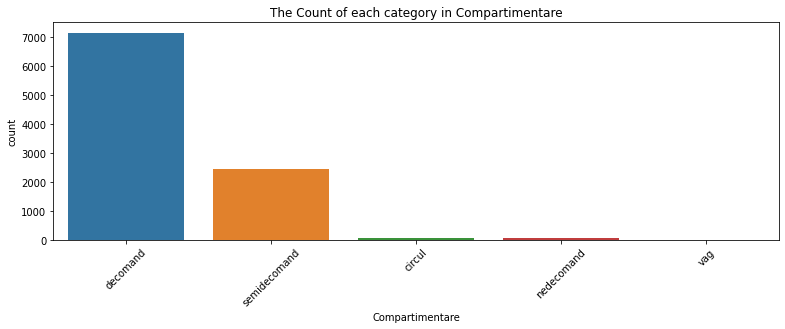

Number of unique values in Compartimentare is: 6
decomand       73.58665
semidecomand   25.11585
circul          0.71053
nedecomand      0.57667
vag             0.01030
Name: Compartimentare, dtype: float64


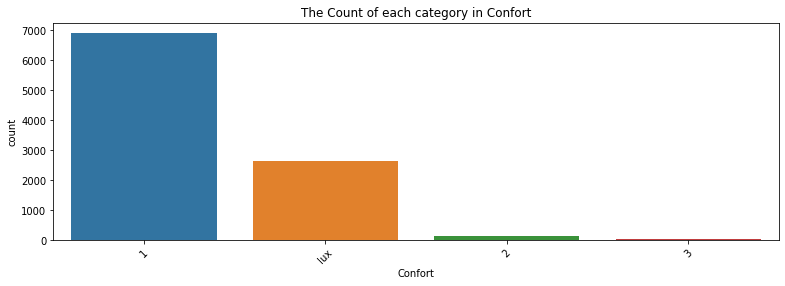

Number of unique values in Confort is: 5
1     71.28549
lux   27.09344
2      1.43521
3      0.18585
Name: Confort, dtype: float64


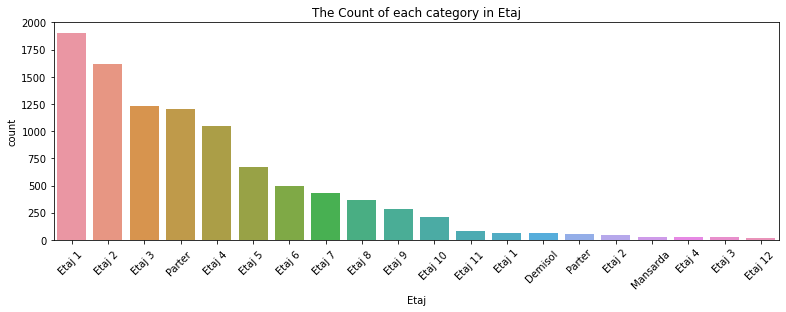

Number of unique values in Etaj is: 39
Etaj 1              19.08626
Etaj 2              16.18074
Etaj 3              12.35347
Parter              12.04288
Etaj 4              10.45987
Etaj 5               6.71275
Etaj 6               4.91935
Etaj 7               4.27813
Etaj 8               3.70704
Etaj 9               2.83539
Etaj 10              2.08396
Etaj 11              0.83158
Etaj 1               0.65124
Demisol              0.63120
Parter               0.51097
Etaj 2               0.41078
Mansarda             0.30057
Etaj 4               0.30057
Etaj 3               0.25048
Etaj 12              0.20038
Ultimele 2 etaje     0.19036
Etaj 8               0.17032
Etaj 5               0.14027
Etaj 7               0.13025
Etaj 6               0.08015
Etaj 10              0.07013
Etaj 15              0.07013
Etaj 14              0.07013
Etaj 13              0.06011
Etaj 11              0.05010
Demisol              0.04008
Mansarda             0.03006
Etaj 16              0.03006
Etaj

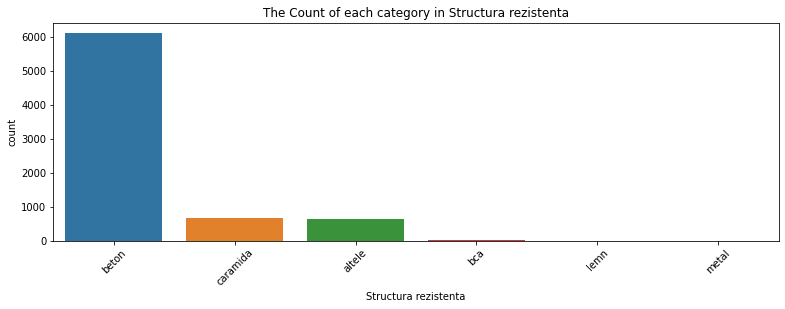

Number of unique values in Structura rezistenta is: 7
beton      82.24374
caramida    9.02610
altele      8.62255
bca         0.05381
lemn        0.02690
metal       0.02690
Name: Structura rezistenta, dtype: float64


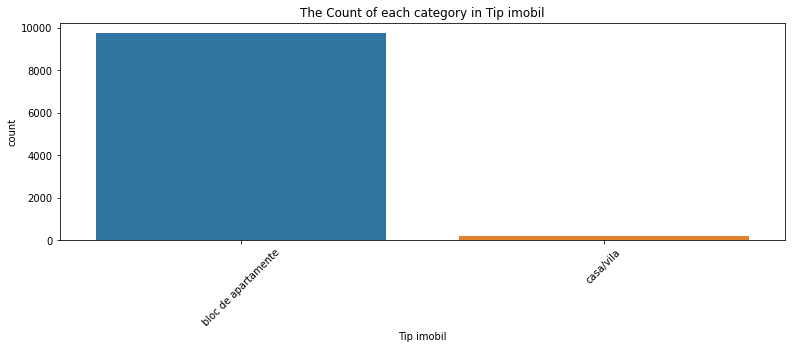

Number of unique values in Tip imobil is: 3
bloc de apartamente   98.14908
casa/vila              1.85092
Name: Tip imobil, dtype: float64


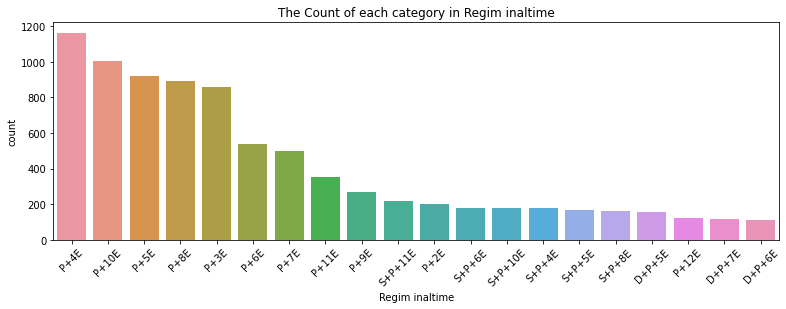

Number of unique values in Regim inaltime is: 110
P+4E          11.94336
P+10E         10.29140
P+5E           9.43977
P+8E           9.15247
P+3E           8.80361
P+6E           5.50995
P+7E           5.10979
P+11E          3.63226
P+9E           2.77037
S+P+11E        2.23682
P+2E           2.08291
S+P+6E         1.83665
S+P+10E        1.81613
S+P+4E         1.80587
S+P+5E         1.71352
S+P+8E         1.67248
D+P+5E         1.63144
P+12E          1.27232
D+P+7E         1.19023
D+P+6E         1.15945
S+P+7E         1.06710
S+P+3E         0.89267
D+P+4E         0.86189
D+P+8E         0.82085
D+P+3E         0.70798
P+2E+M         0.62590
S+P+9E         0.62590
S+P+12E        0.62590
P+3E+M         0.52329
P+1E           0.37964
S+P+2E+M       0.37964
S+P            0.32834
P+13E          0.30782
D+P+11E        0.29756
P+5E+M         0.26678
D+P+10E        0.26678
P+14E          0.25652
D+P+8E+M       0.24625
S+P+3E+M       0.24625
D+P+2E         0.22573
P+16E          0.22573
D+P+3E+

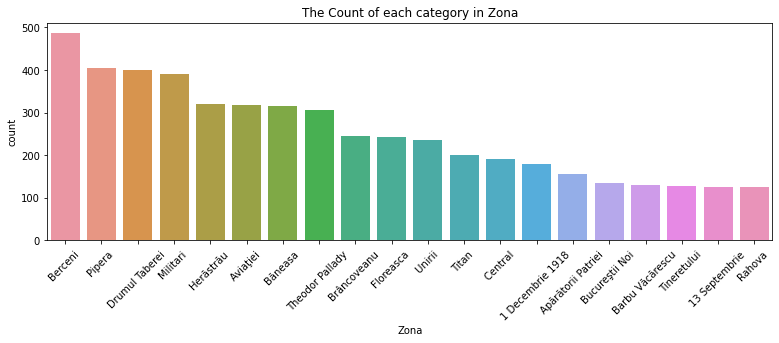

Number of unique values in Zona is: 223
Berceni                  5.03724
Pipera                   4.18908
Drumul Taberei           4.13736
Militari                 4.04427
Herăstrău                3.29954
Aviaţiei                 3.27886
Băneasa                  3.26851
Theodor Pallady          3.17542
Brâncoveanu              2.54448
Floreasca                2.51345
Unirii                   2.44104
Titan                    2.07902
Central                  1.96525
1 Decembrie 1918         1.85147
Apărătorii Patriei       1.61357
Bucureştii Noi           1.38602
Barbu Văcărescu          1.34464
Tineretului              1.32396
13 Septembrie            1.30327
Rahova                   1.30327
Pantelimon               1.26189
Prelungirea Ghencea      1.23086
Dristor                  1.22052
Domenii                  1.17915
Dorobanţi                1.06537
Colentina                1.04468
Lujerului                1.04468
Ştefan cel Mare          1.04468
Mihai Bravu              0.95159
Ian

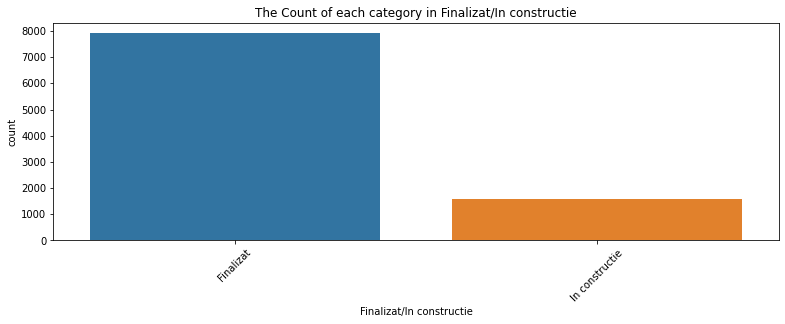

Number of unique values in Finalizat/In constructie is: 3
Finalizat        83.38079
In constructie   16.61921
Name: Finalizat/In constructie, dtype: float64


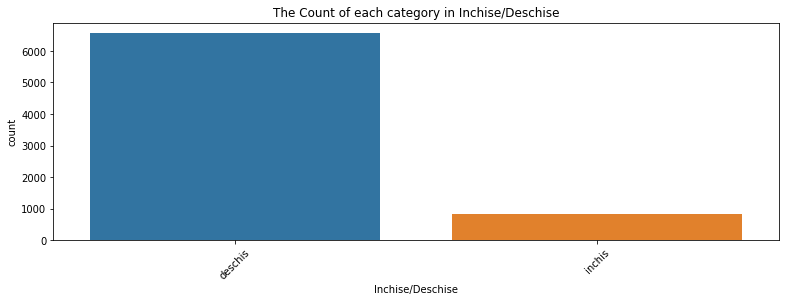

Number of unique values in Inchise/Deschise is: 3
deschis   88.84683
inchis    11.15317
Name: Inchise/Deschise, dtype: float64


In [16]:
categorical_features = [feature for feature in df_copy.columns if df_copy[feature].dtype == 'object']
print('There are {} categorical variables in our dataset.'.format(len(categorical_features)))

for feature in categorical_features:
    plt.figure(figsize=(13, 4))
    sns.countplot(feature, data=df_copy, order=df_copy[feature].value_counts().iloc[:20].index)
    plt.title('The Count of each category in {}'.format(feature))
    plt.xticks(rotation=45)
    plt.show()
    print('Number of unique values in {0} is: {1}'.format(feature, len(df_copy[feature].unique())))
    print(df_copy[feature].value_counts(normalize=True) * 100)

## 2. Numerical Variables

With regards to numerical variables, we will try to deduce some statistical details i.e. the **central tendency** (where the center of our data is) and **measures of dispersion** (how spread the data are). **Mean, median and mode** are the 3 central tendency measures. Mean is commonly used but very sensitive to extreme values, median however, is expected to be utilized in such cases. Mode should be applied for categorical data. **Variance and standard deviation** explain the spread of data around a central value. Represented below are the count, mean, standard deviation, and the 5 quartiles of each independent numerical variable. 

In [17]:
df_copy.describe()

Nr camere  Suprafata utila  Suprafata utila totala  \
count 9980.00000       9920.00000              3560.00000   
mean     2.46413         72.42956                76.87635   
std      0.94302         39.75702               153.51875   
min      1.00000          5.63000                15.00000   
25%      2.00000         50.36000                53.00000   
50%      2.00000         63.00000                63.15000   
75%      3.00000         82.00000                84.00000   
max     15.00000        621.00000              8866.00000   

       Suprafata construita  Nr. bucatarii    Nr. bai  An constructie  \
count            8891.00000     8487.00000 9483.00000      9483.00000   
mean               88.80934        1.00695    1.43678      2005.61890   
std                56.82269        0.14426    0.65216        21.89666   
min                 1.09200        1.00000    1.00000      1880.00000   
25%                60.00000        1.00000    1.00000      1990.00000   
50%                74.00000        1.00000    1.00000      2019.00000   
75%                98.00000        1.00000    2.00000      2020.00000   
max               880.00000       12.00000   11.00000      2023.00000   

       Nr. garaje  Nr. locuri parcare  Nr. balcoane          Pret  
count   515.00000          2485.00000    7397.00000    9981.00000  
mean      1.36311             1.56700       1.23956  132852.93237  
std       3.56188             5.43369       0.57947  180060.18043  
min       1.00000             1.00000       1.00000   16500.00000  
25%       1.00000             1.00000       1.00000   62300.00000  
50%       1.00000             1.00000       1.00000   86900.00000  
75%       1.00000             1.00000       1.00000  139500.00000  
max      58.00000            99.00000      14.00000 6000000.00000

Also, we would like to see how the **distribution our data** falls under presents itself. Many numerical variables contain **outliers** (extreme values that could negatively impact statistical analysis). To visualise this, we will be utilizing **Histograms** and Box-And-Whiskers plots a.k.a **Box plots**. Box plots are composed of **5 stages**, mentioned previously, which statistically explain the data, these are: **minimum value, 1st quartile, median, 3rd quartile, and maximum value**. Most importantly, box plots reveal the outliers of our data as well. We can clearly see that many of our numerical variables contain outliers. Fully understanding the negative impacts of outliers will prove to be a valuable skill in deciding what the solution for treating them should be:

- Outliers increase residual error 
- Outliers decrease power of statistical tests
- Outliers may decrease normality
-  Outliers may impact the assumptions of Regression



There are 11 numerical variables in our dataset.
Number of unique values in Nr camere is: 13
Number of unique values in Suprafata utila is: 1483
Number of unique values in Suprafata utila totala is: 729
Number of unique values in Suprafata construita is: 1267
Number of unique values in Nr. bucatarii is: 5
Number of unique values in Nr. bai is: 8
Number of unique values in An constructie is: 108
Number of unique values in Nr. garaje is: 7
Number of unique values in Nr. locuri parcare is: 22
Number of unique values in Nr. balcoane is: 9
Number of unique values in Pret is: 2184


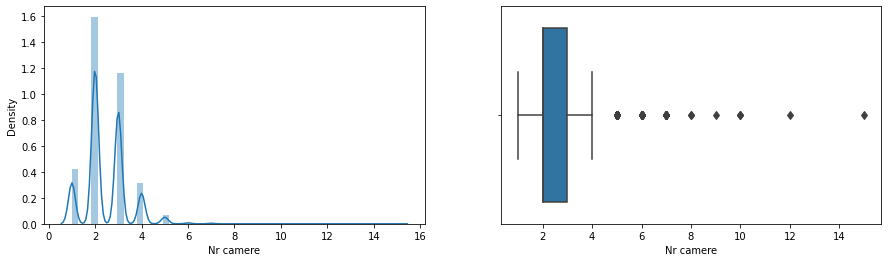

<Figure size 936x288 with 0 Axes>

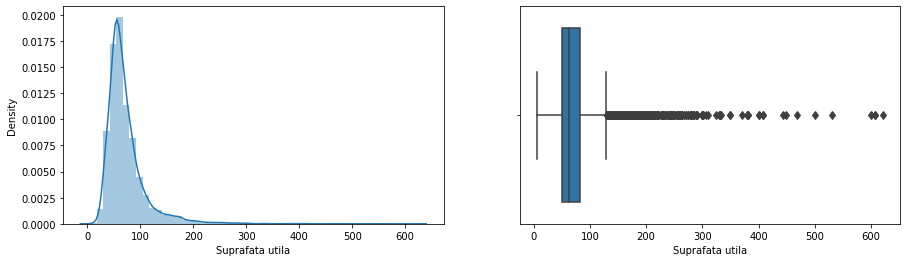

<Figure size 936x288 with 0 Axes>

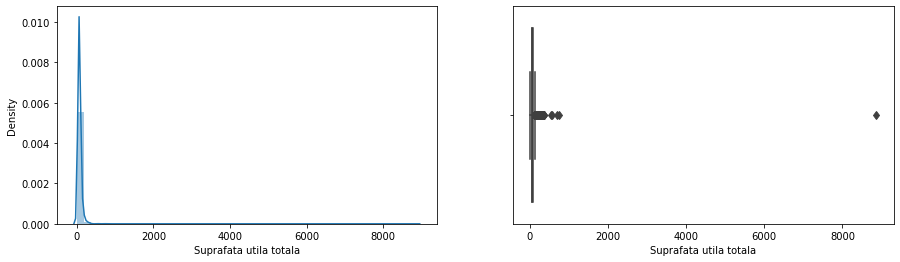

<Figure size 936x288 with 0 Axes>

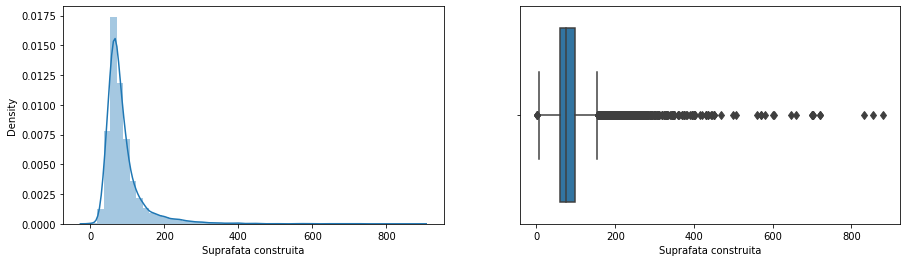

<Figure size 936x288 with 0 Axes>

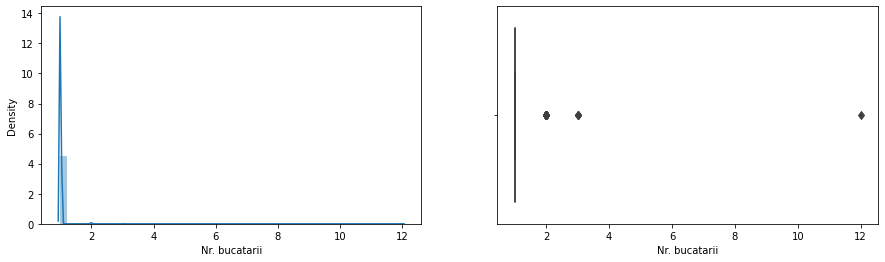

<Figure size 936x288 with 0 Axes>

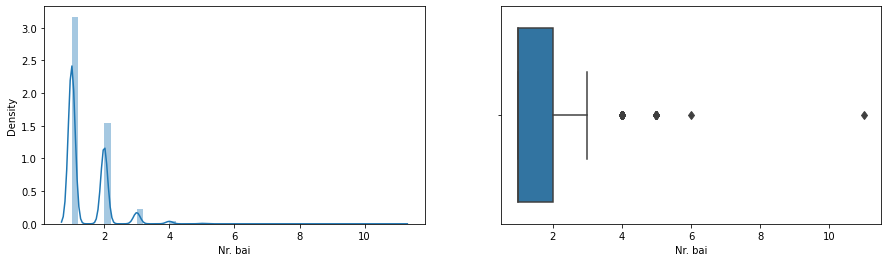

<Figure size 936x288 with 0 Axes>

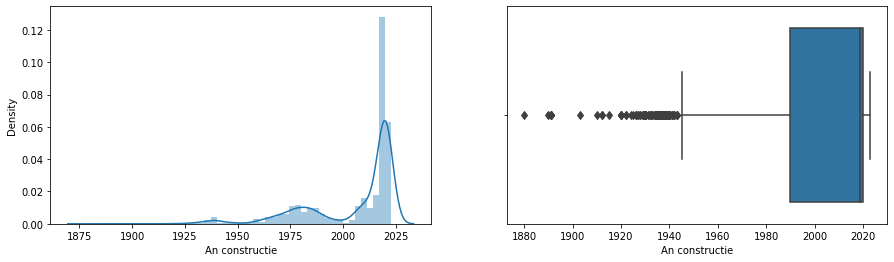

<Figure size 936x288 with 0 Axes>

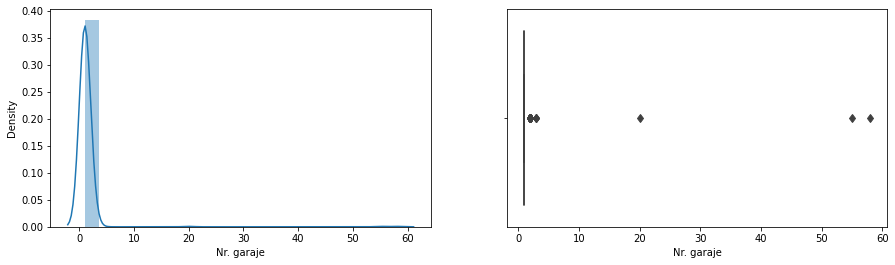

<Figure size 936x288 with 0 Axes>

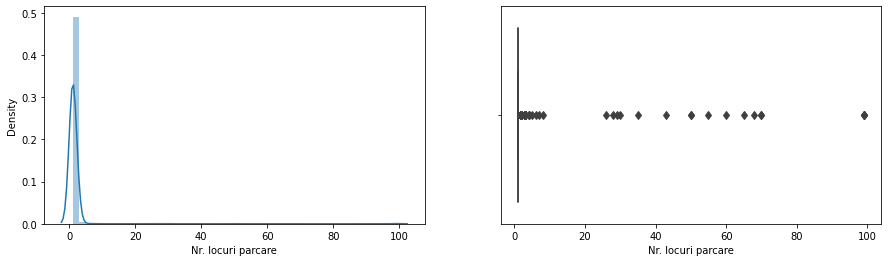

<Figure size 936x288 with 0 Axes>

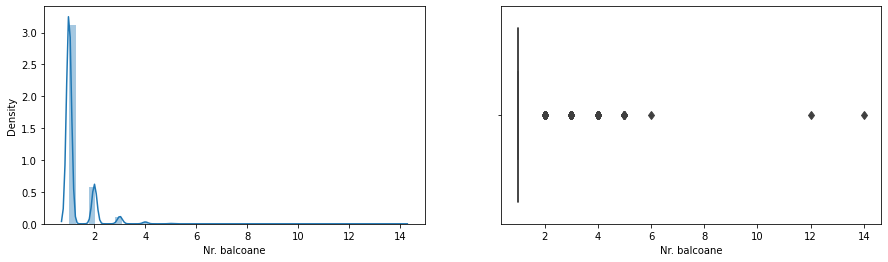

<Figure size 936x288 with 0 Axes>

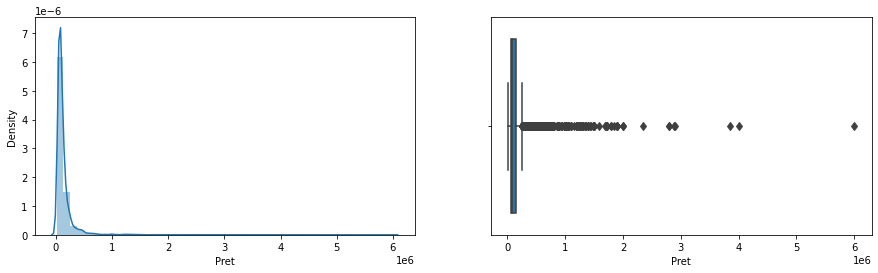

<Figure size 936x288 with 0 Axes>

In [18]:
numerical_features = [feature for feature in df_copy.columns if df_copy[feature].dtype != 'object']
print('There are {} numerical variables in our dataset.'.format(len(numerical_features)))

for feature in numerical_features:
    fig, ax = plt.subplots(ncols = 2, figsize=(15, 4))
    plt.figure(figsize=(13, 4))
    sns.distplot(df_copy[feature], ax=ax[0])
    sns.boxplot(df_copy[feature], ax=ax[1], fliersize=6)
    print('Number of unique values in {0} is: {1}'.format(feature, len(df_copy[feature].unique()))) 

# ***Bivariate Analysis***

## 1. Numerical & Numerical


Let us analyse the relationships between all the numerical variables of our dataset. We shall learn about **correlation** and its importance. The correlation is a **statistical measure** which states the extent to which 2 variables are linearly related. It is important to understand whether the independent variables are correlated with the other variables or if no correlation is present and also the **strength of these relations**. The final predictions will benefit greatly from such insights. If there is high correlation, the predictions will be more accurate. We can check the relationships between our variables by using a **scatterplot** and the seaborn library offers this tool.


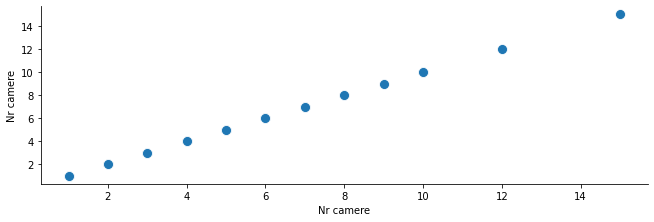

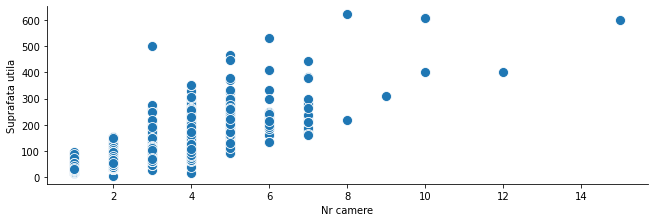

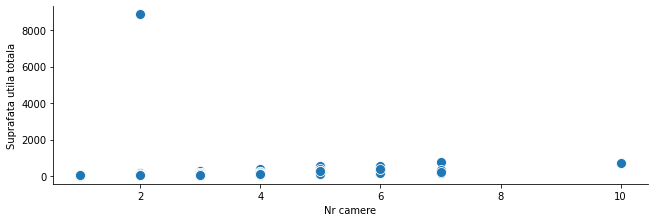

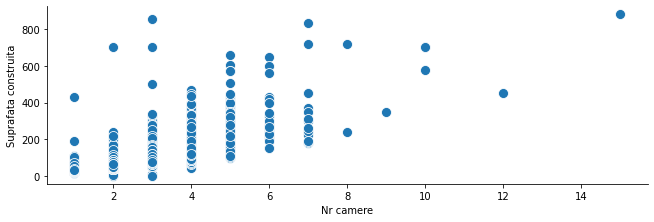

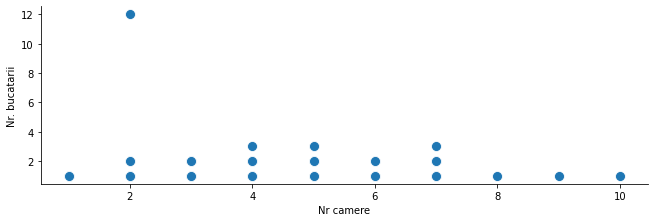

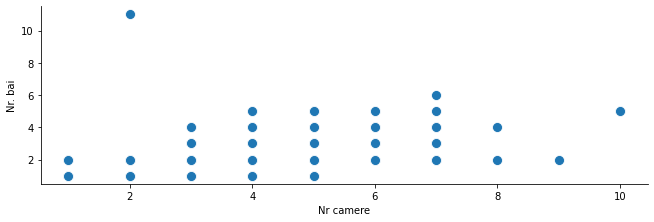

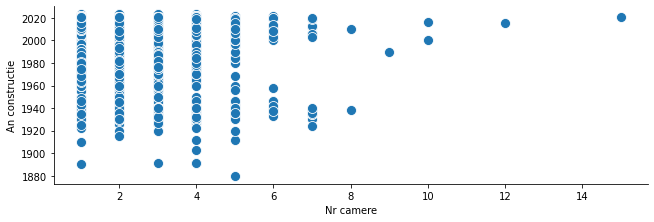

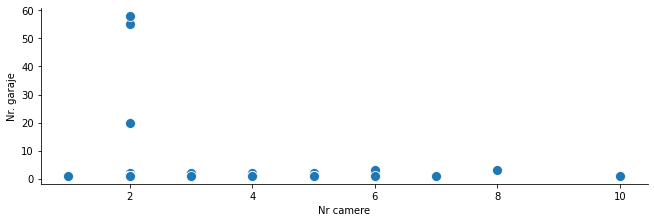

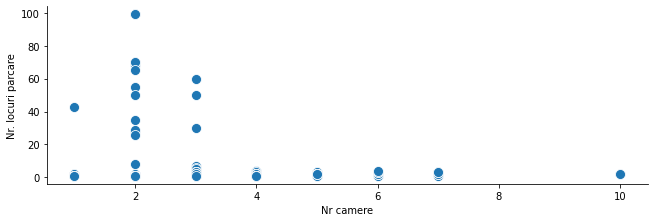

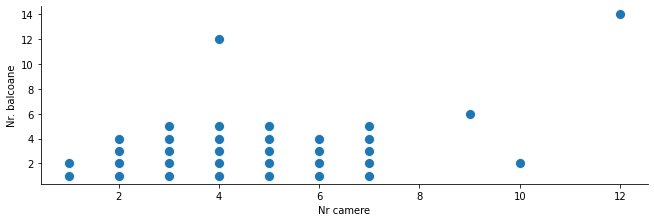

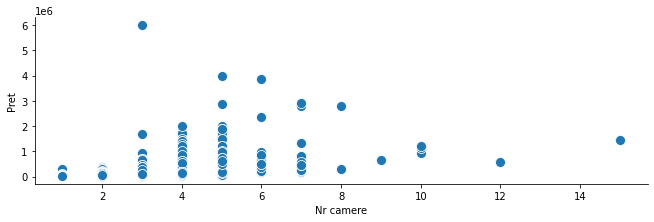

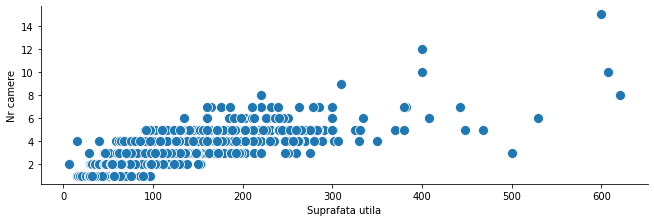

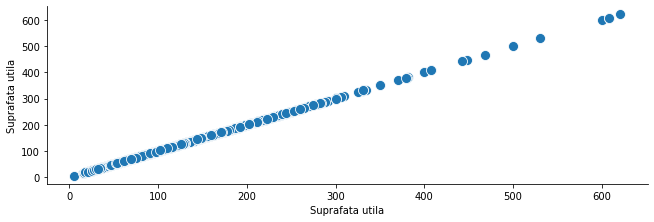

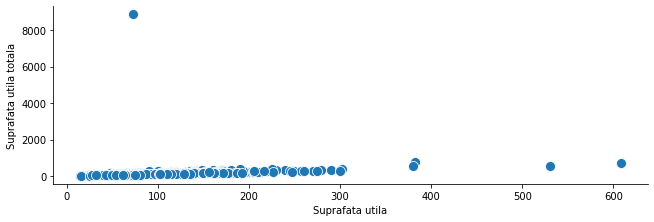

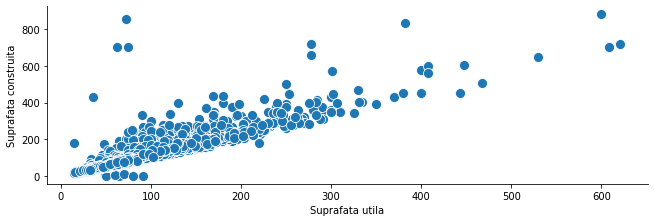

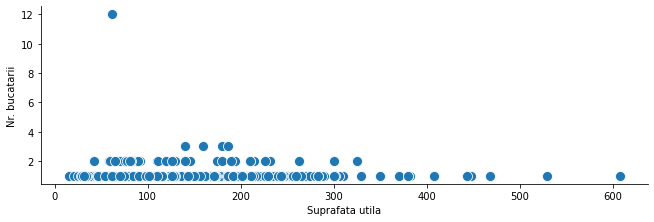

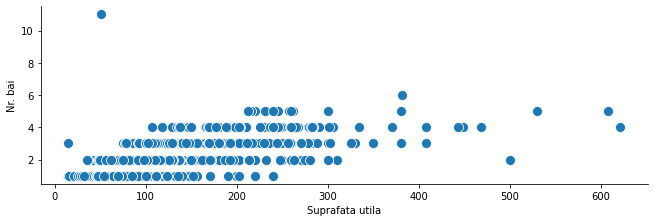

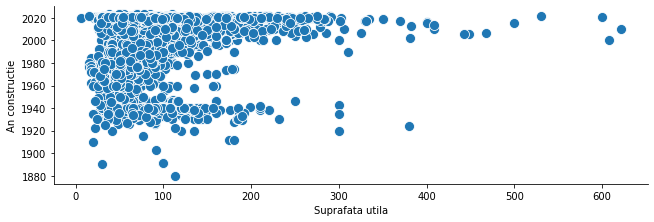

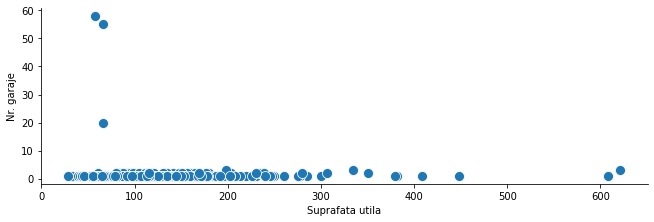

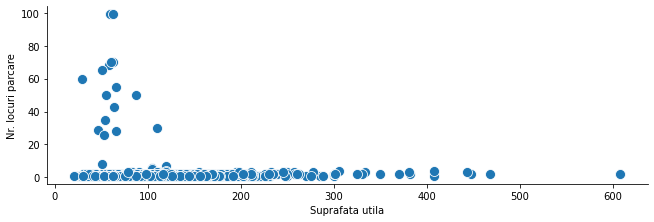

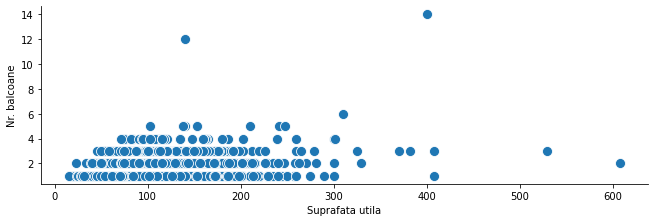

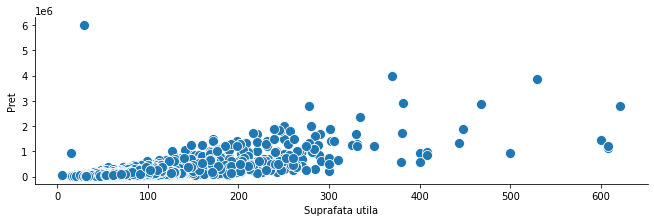

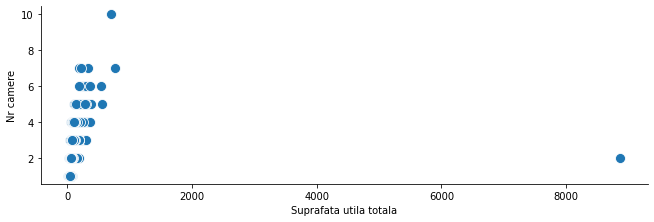

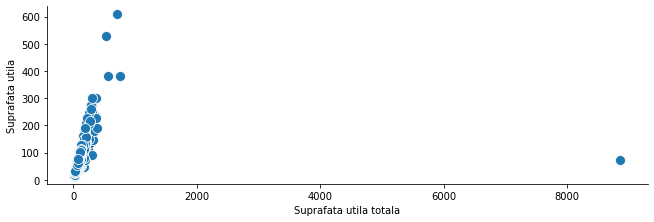

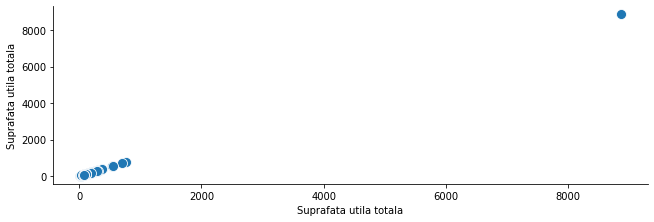

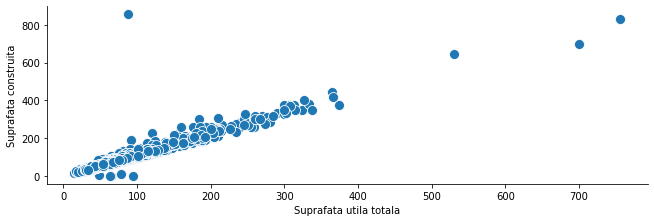

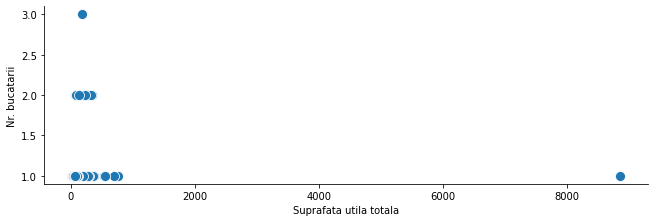

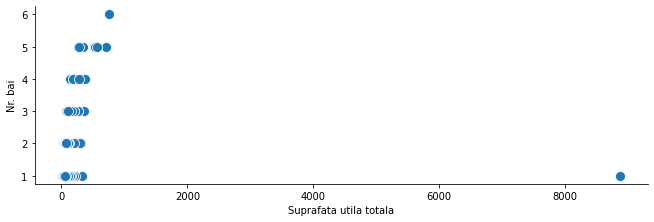

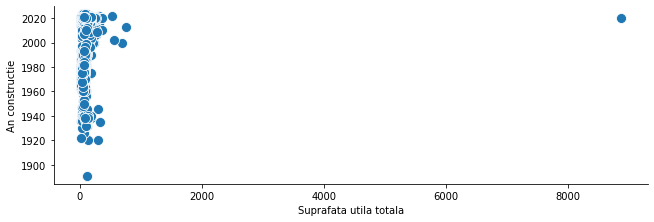

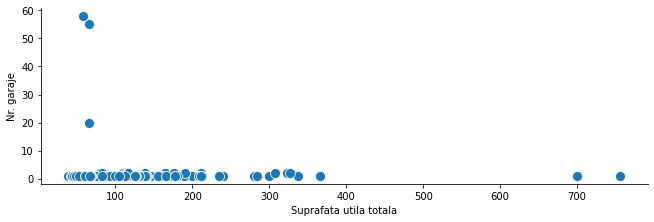

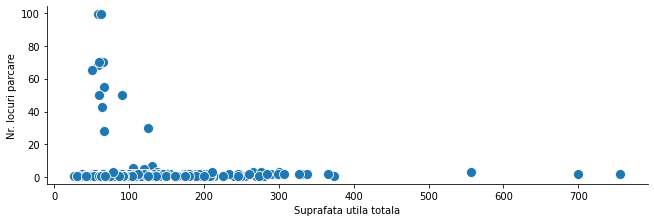

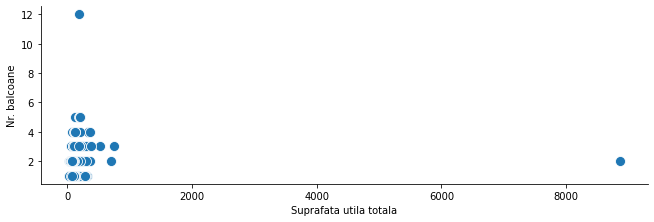

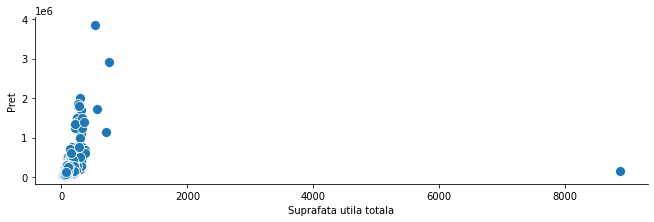

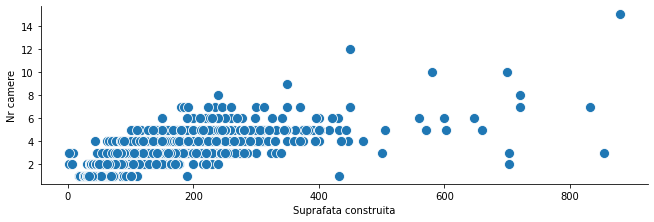

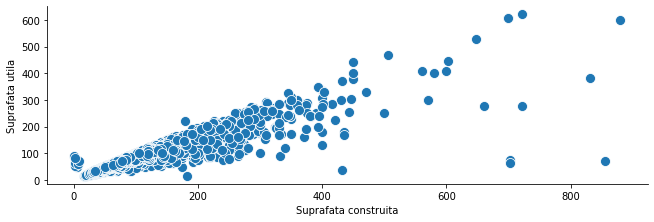

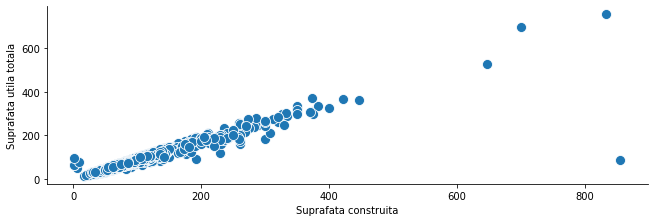

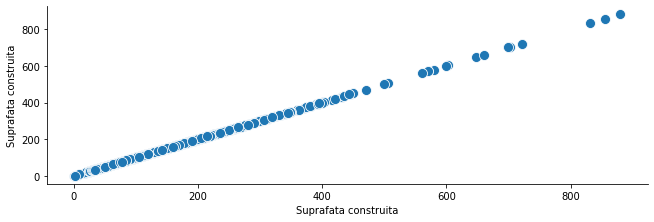

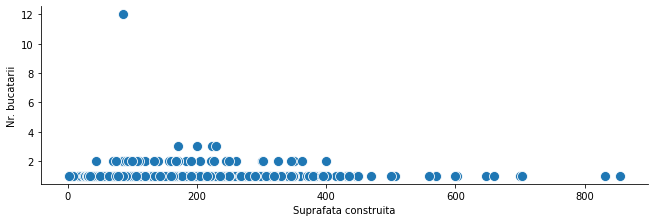

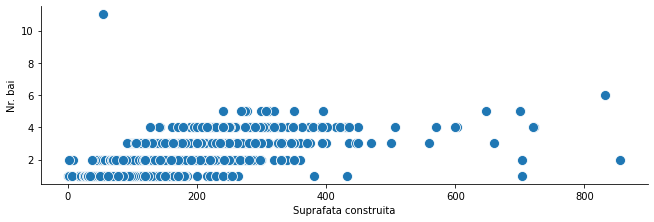

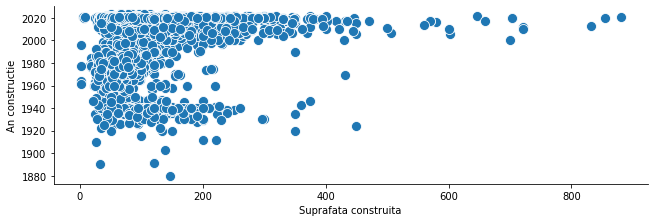

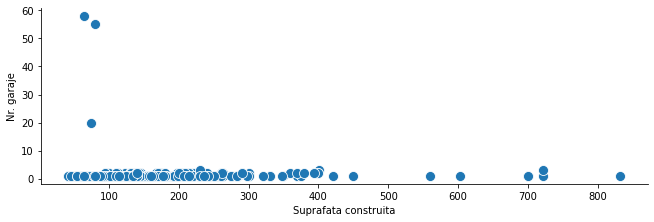

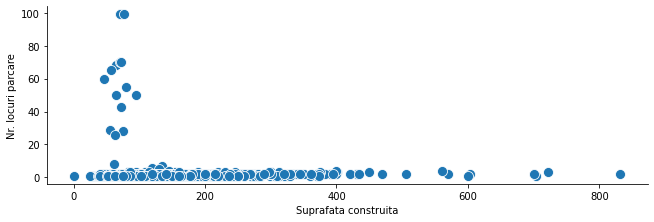

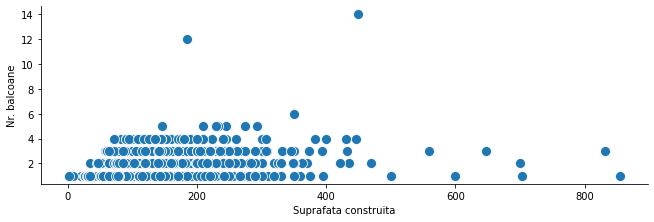

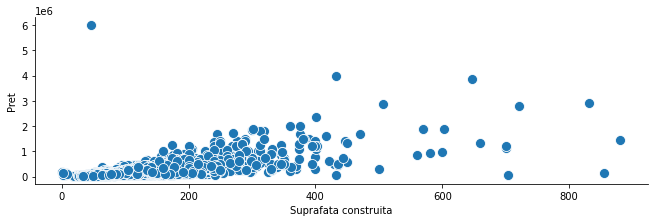

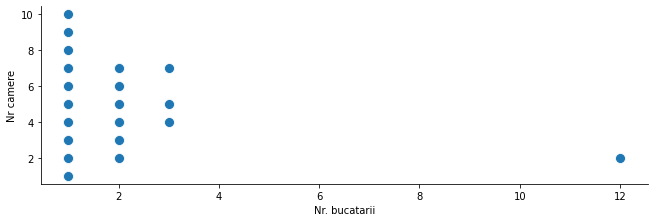

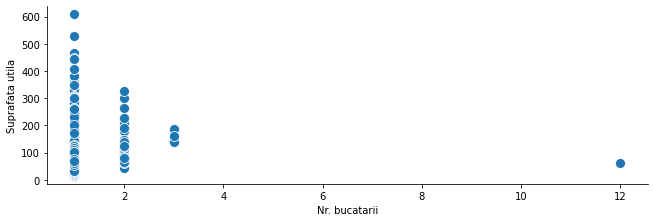

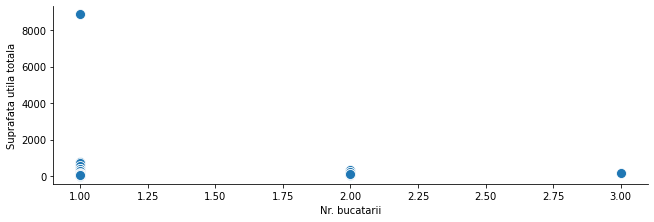

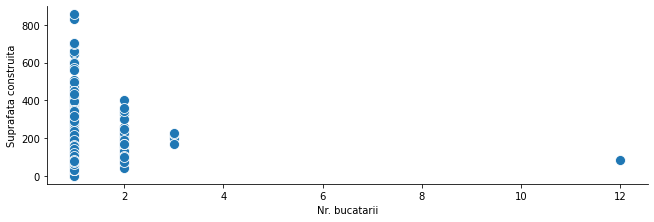

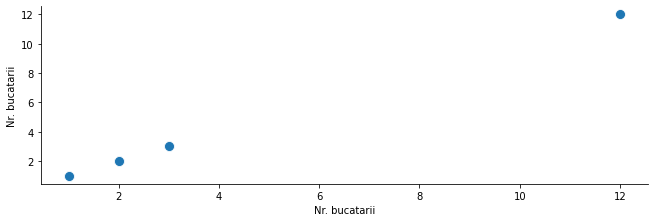

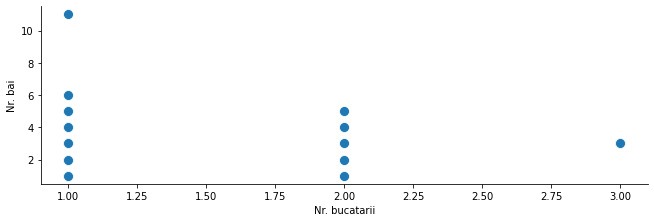

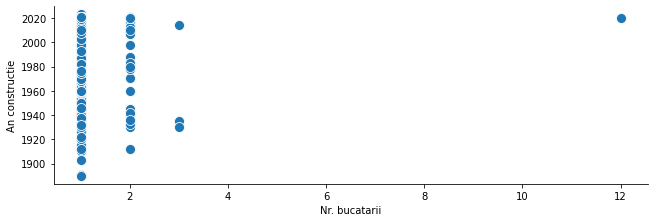

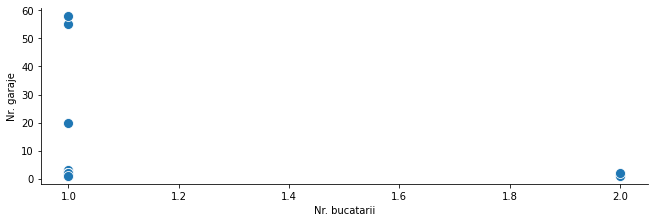

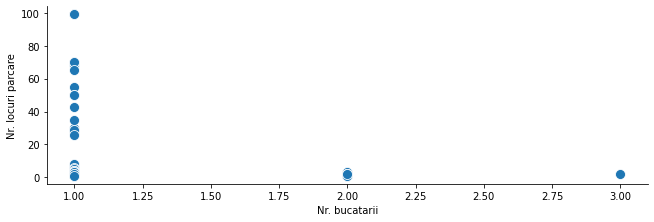

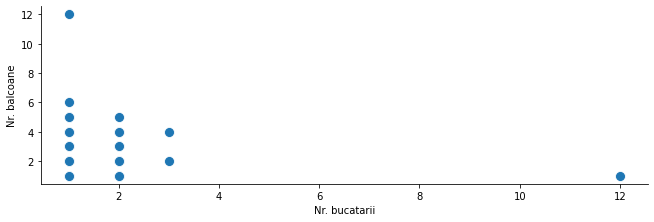

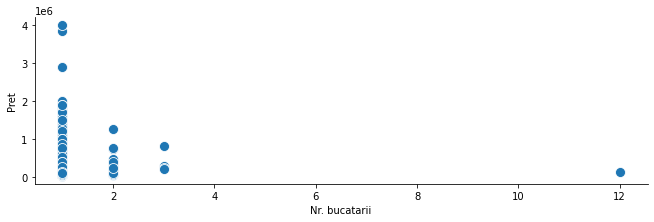

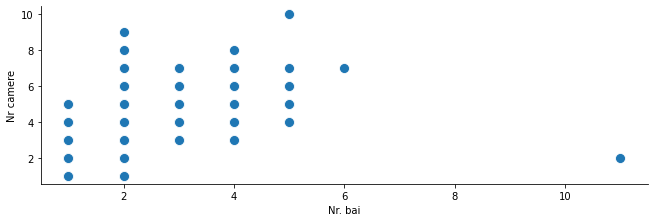

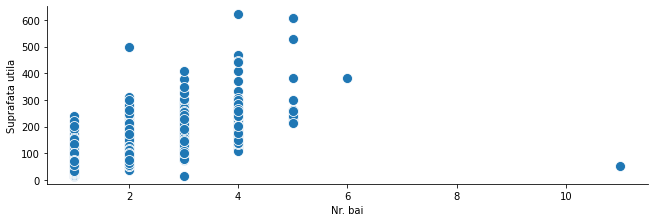

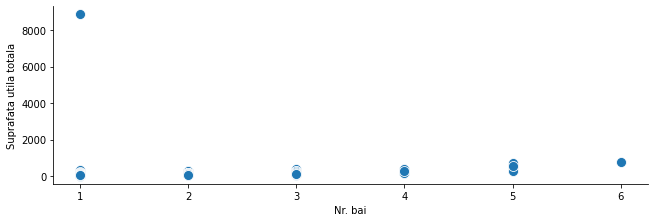

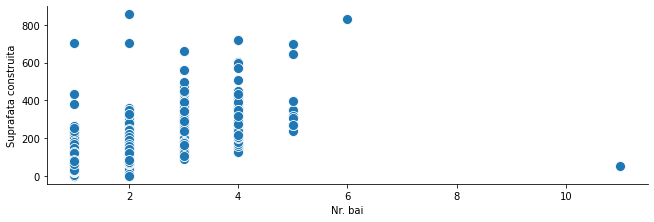

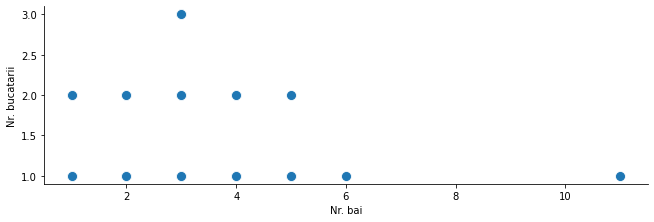

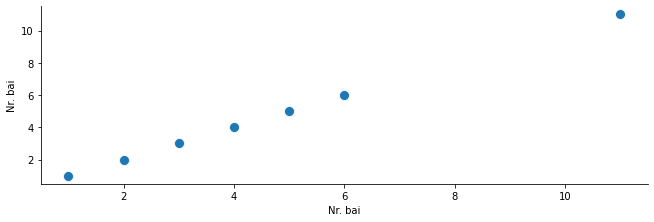

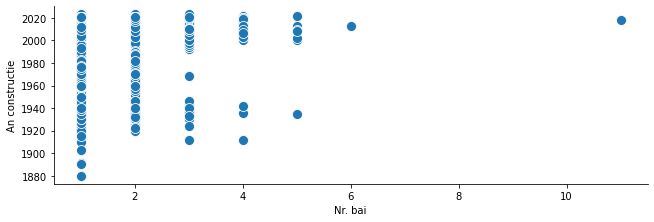

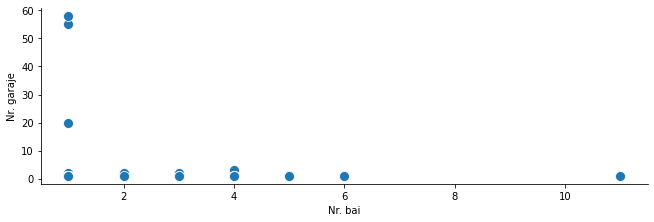

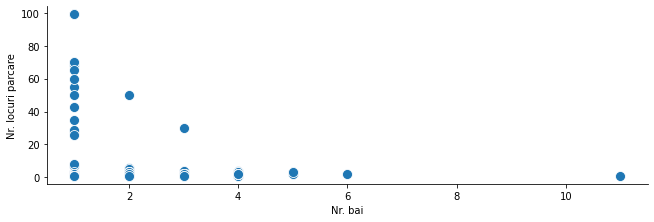

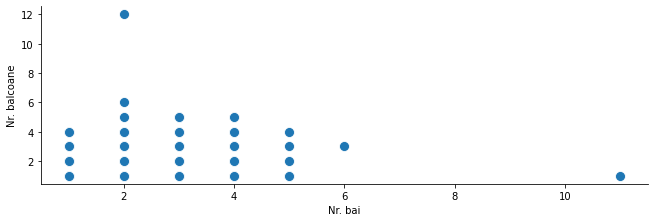

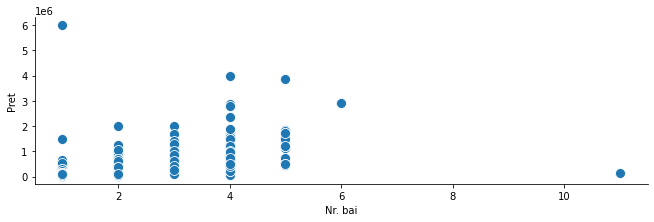

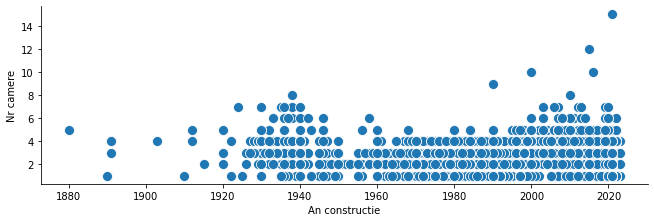

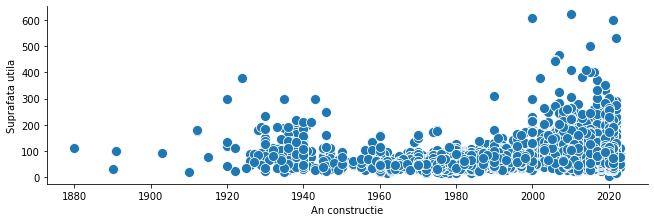

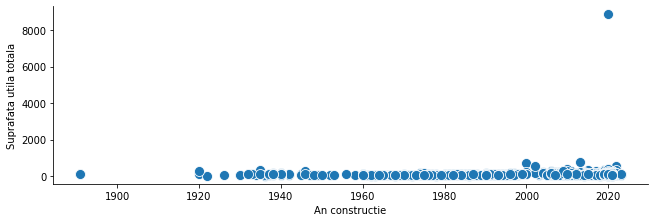

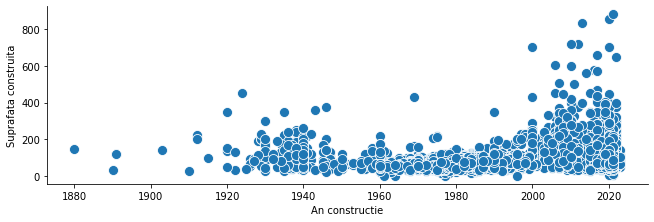

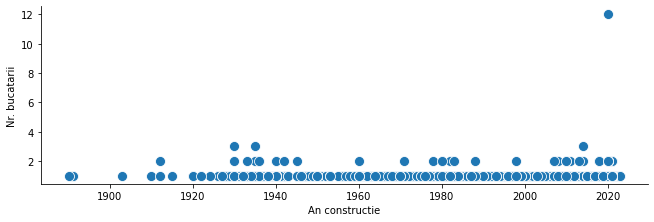

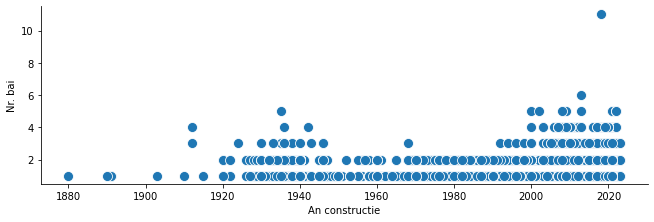

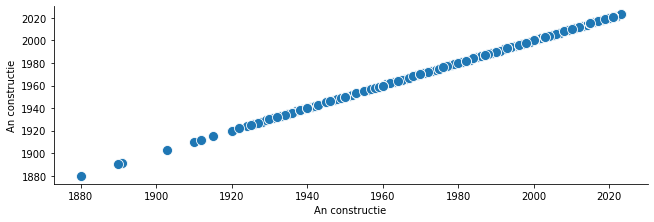

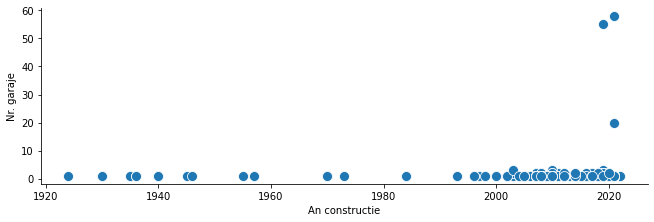

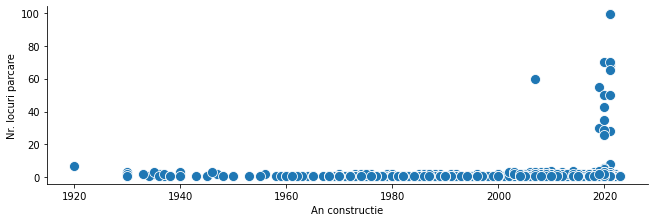

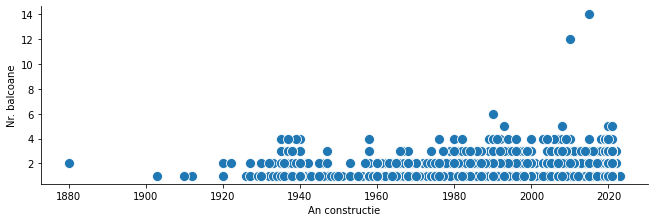

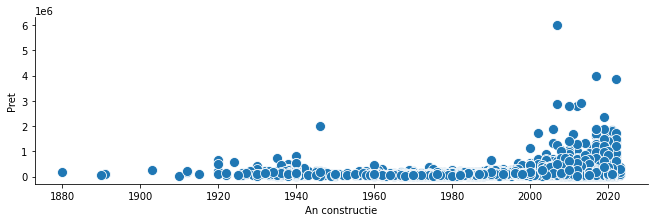

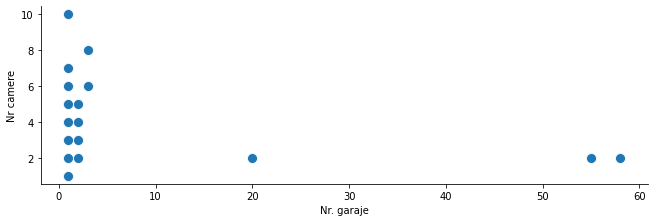

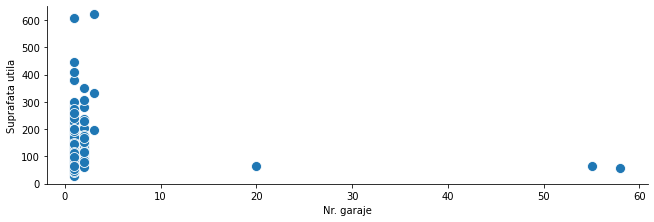

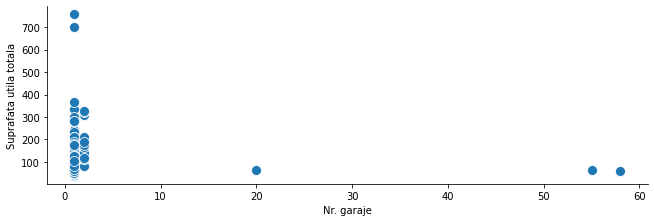

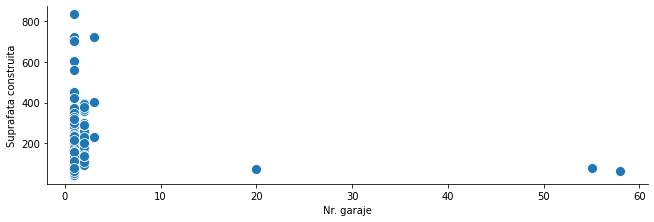

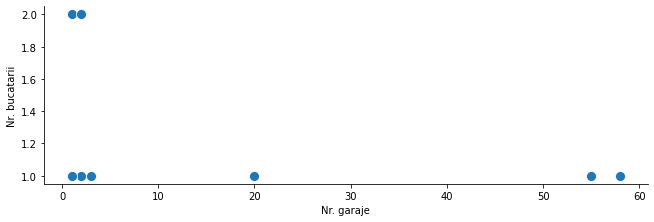

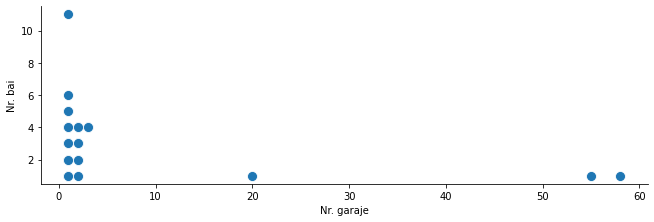

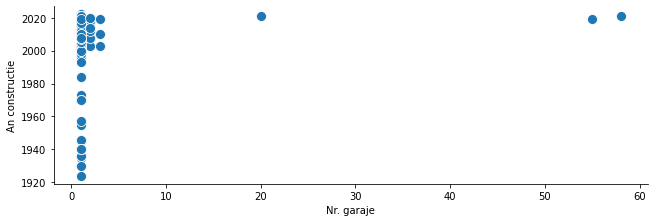

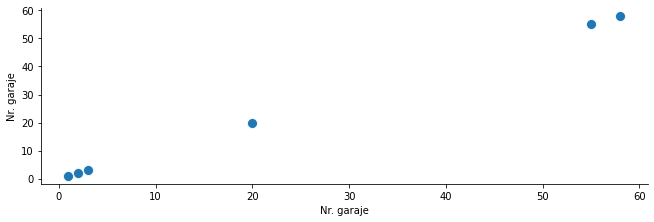

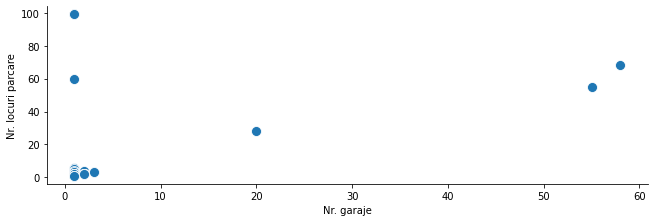

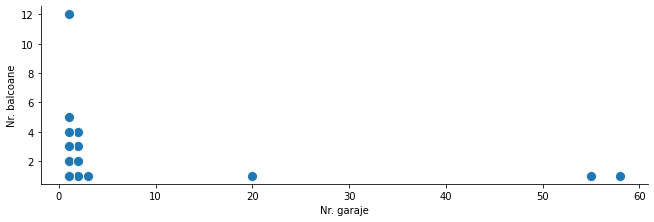

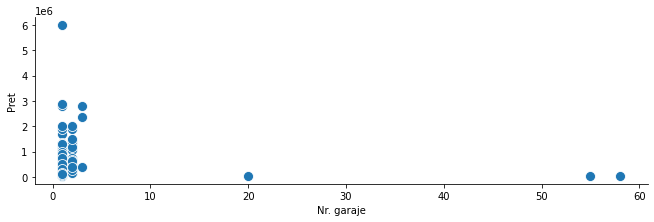

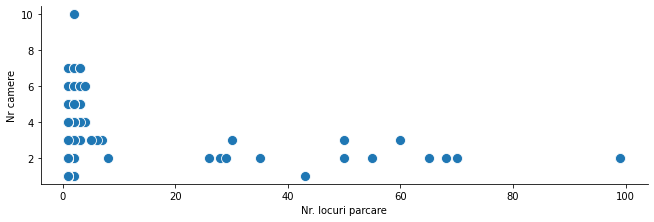

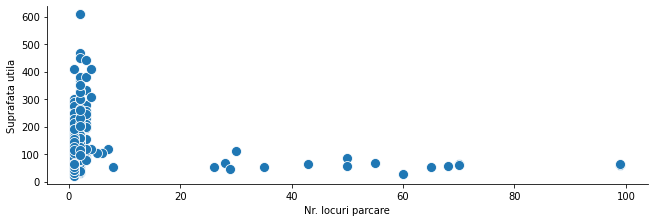

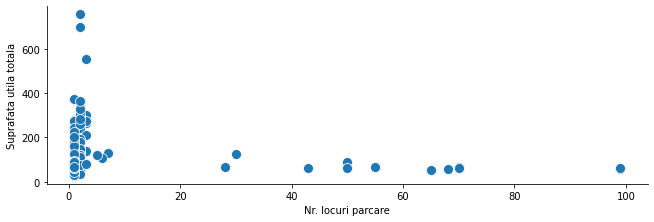

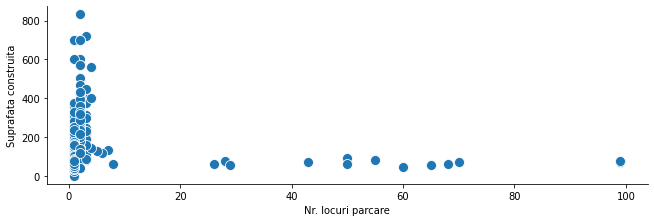

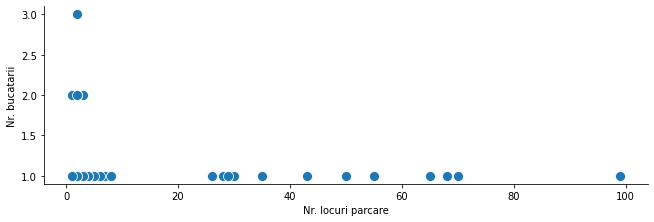

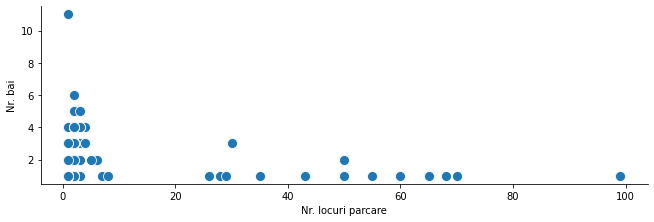

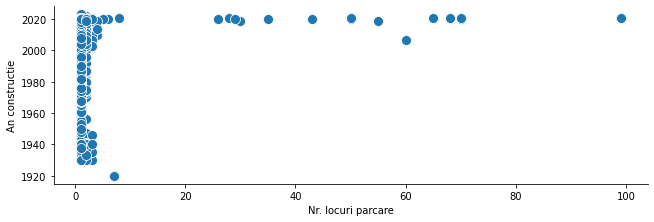

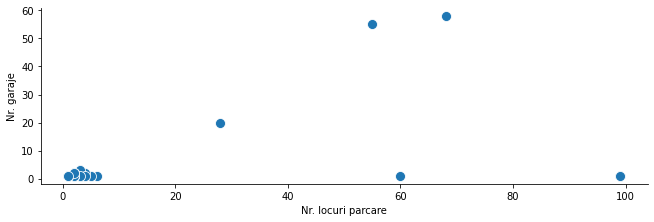

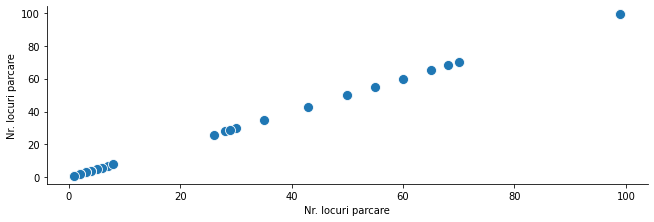

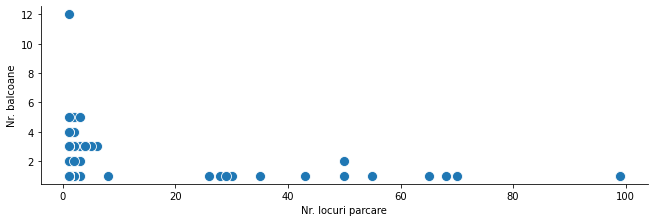

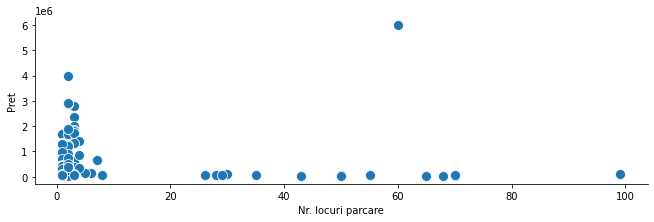

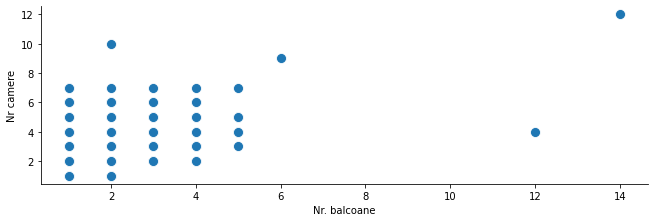

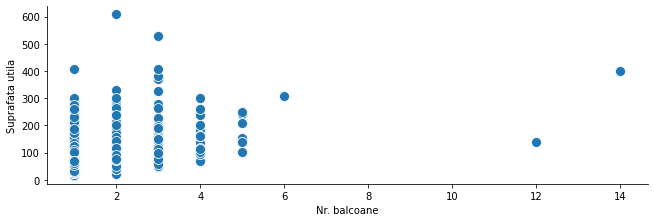

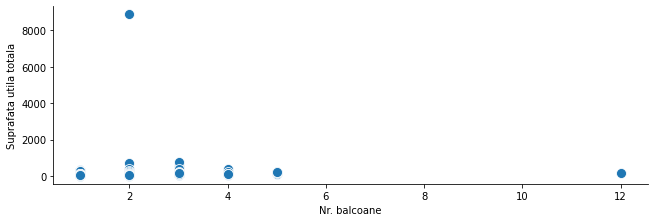

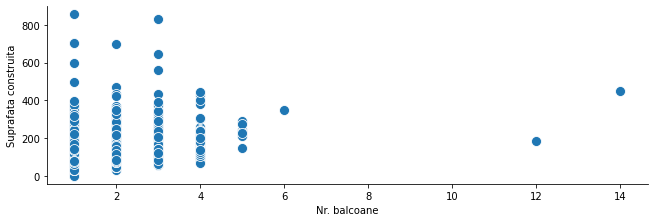

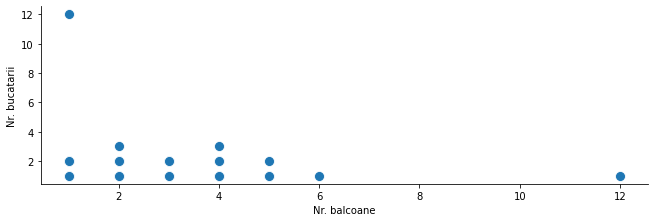

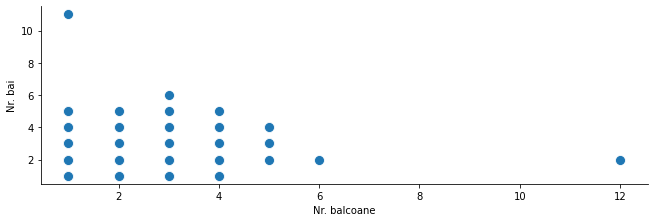

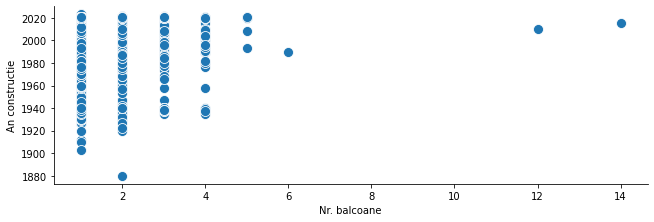

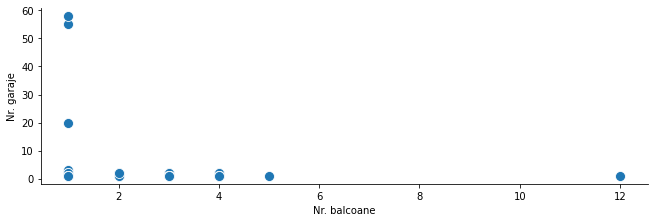

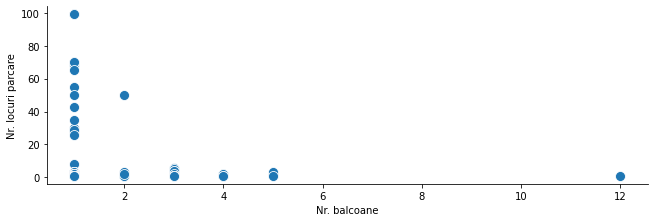

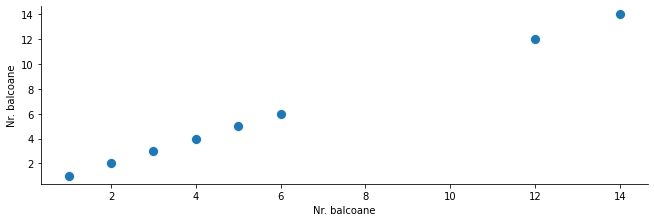

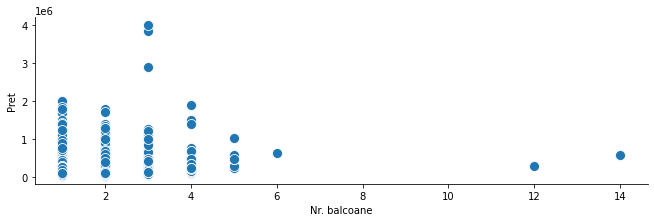

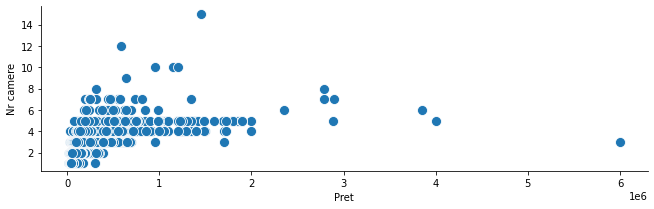

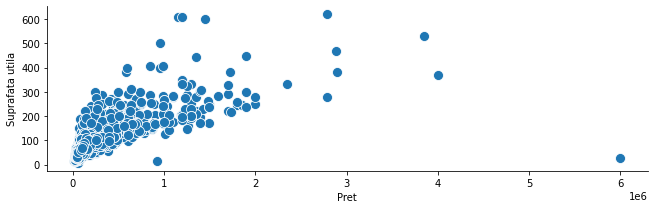

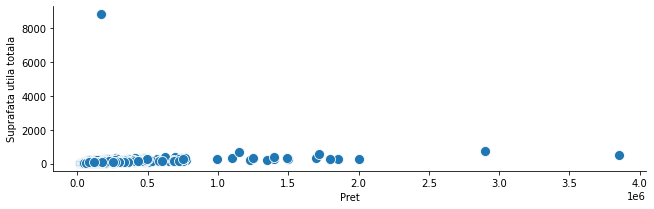

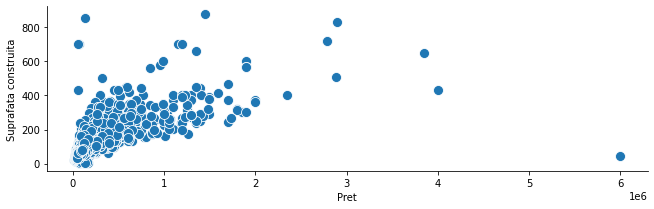

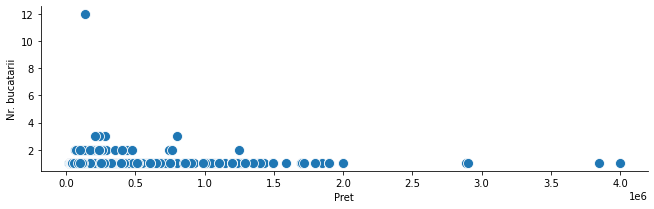

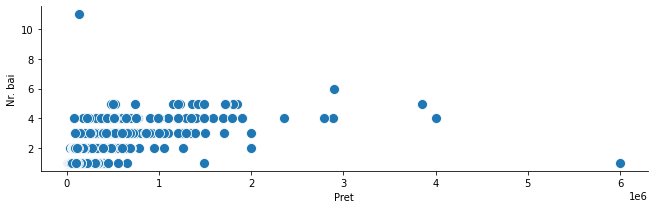

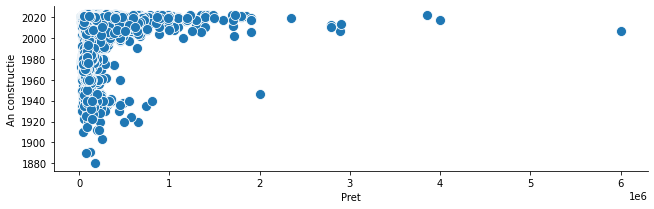

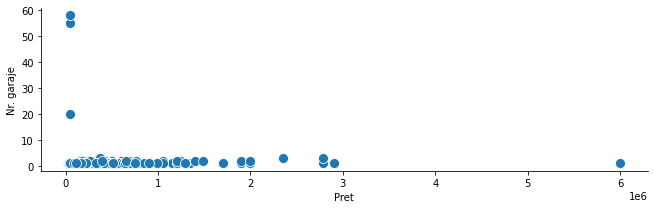

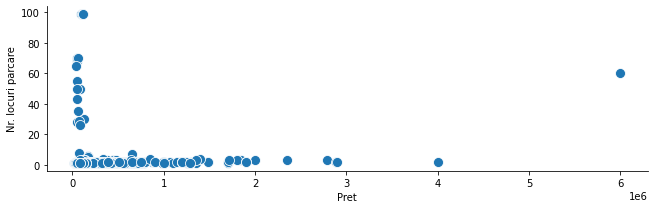

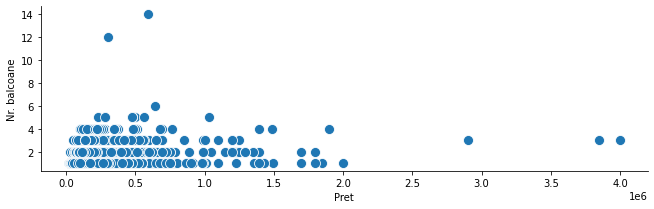

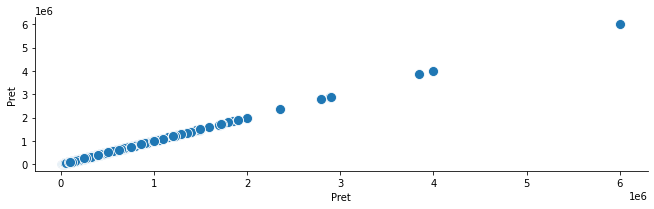

In [19]:
numerical_features = [feature for feature in df_copy.columns if df_copy[feature].dtype != 'object']

for feature in numerical_features:
    for feature2 in numerical_features:
        sns.relplot(x=df_copy[feature], y=df_copy[feature2], data=df_copy, aspect=3, s=100, height=3)

As mentioned previously, the best way to check for the strength of relationships between features is by finding Pearson's correlation coeficient. It ranges from (-1, 1) with **-1 meaning there is negative correlation, 0 meaning there is no correlation, and 1 meaning positive correlation**. The best way to check for correlation is by using a **heatmap**. Seaborn offers the possiblity to do so.

Text(0.5, 1.0, 'Correlation Heatmap')

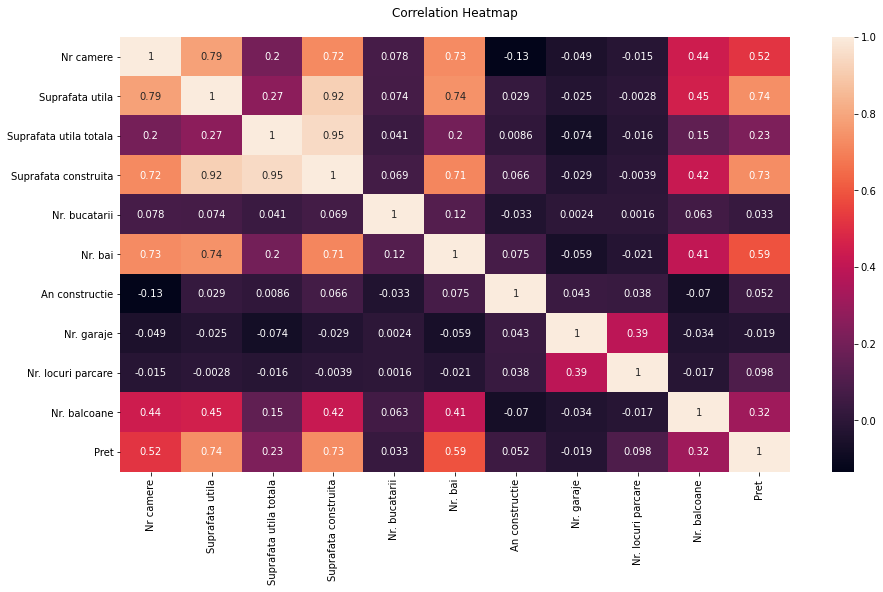

In [20]:
numerical_features = df_copy.select_dtypes('number')

plt.figure(figsize=(15, 8))
corr = numerical_features.corr()
heatmap = sns.heatmap(corr, annot=True)
heatmap.set_title('Correlation Heatmap', pad=20)

## 2. Categorical & Categorical

The best way to interpret the realationship between 2 categorical variables is by creating a **contingency table**. Pandas offers the possiblity to create such a table by using the **crosstab function**. We can clearly read the frequency distribution between all categorical 
features of the dataset.


In [21]:
categorical_features = [feature for feature in df_copy.columns if df_copy[feature].dtype == 'object']

for feature in categorical_features:
    for feature2 in categorical_features:
        contingency_table = pd.crosstab(df_copy[feature], df_copy[feature2], margins=True)
        print(contingency_table)
        print('========'*15)

Compartimentare  circul  decomand  nedecomand  semidecomand  vag   All
Compartimentare                                                       
circul               69         0           0             0    0    69
decomand              0      7146           0             0    0  7146
nedecomand            0         0          56             0    0    56
semidecomand          0         0           0          2439    0  2439
vag                   0         0           0             0    1     1
All                  69      7146          56          2439    1  9711
Confort             1    2   3   lux   All
Compartimentare                           
circul             64    0   0     4    68
decomand         4937   60  12  2016  7025
nedecomand         42    4   1     6    53
semidecomand     1777   74   4   530  2385
vag                 1    0   0     0     1
All              6821  138  17  2556  9532
Etaj             Demisol  Demisol   Etaj 1  Etaj 1   Etaj 10  Etaj 10   \
Compartimentar

Zona             1 Decembrie 1918   1 Mai   13 Septembrie   16 Februarie   \
Compartimentare                                                             
circul                           0       0               0              0   
decomand                       162      44              95              1   
nedecomand                       0       0               1              0   
semidecomand                    16      29              30              1   
vag                              0       0               0              0   
All                            178      73             126              2   

Zona             Alba Iulia   Alexandriei   Alexandru Obregia   Amzei   \
Compartimentare                                                          
circul                     0             0                   0       0   
decomand                   2             8                  14       2   
nedecomand                 0             0                   0       0   
semidecomand 

Regim inaltime  D+P  D+P+10E  D+P+10E+M  D+P+11E  D+P+12E  D+P+13E  D+P+17E  \
Confort                                                                       
1                 5       16          0       16        4        0        1   
2                 1        0          0        0        0        0        0   
3                 0        0          0        0        0        0        0   
lux               4        9          1       13        1        1        0   
All              10       25          1       29        5        1        1   

Regim inaltime  D+P+1E  D+P+1E+M  D+P+2E  D+P+2E+M  D+P+3E  D+P+3E+M  D+P+4E  \
Confort                                                                        
1                   16         5      11        15      45        15      39   
2                    0         0       2         0       0         1       0   
3                    0         0       0         0       1         0       0   
lux                  2         2       9      

Compartimentare    circul  decomand  nedecomand  semidecomand  vag   All
Etaj                                                                    
Demisol                 0         3           0             1    0     4
Demisol                 0        48           0            12    0    60
Etaj 1                  0        46           0            15    0    61
Etaj 1                 15      1452           9           396    0  1872
Etaj 10                 0         2           0             3    0     5
Etaj 10                 1       142           0            53    1   197
Etaj 11                 0         4           1             0    0     5
Etaj 11                 2        66           1            13    0    82
Etaj 12                 0        14           0             6    0    20
Etaj 13                 0         5           0             1    0     6
Etaj 14                 0         7           0             0    0     7
Etaj 15                 0         3           0    

Zona               1 Decembrie 1918   1 Mai   13 Septembrie   16 Februarie   \
Etaj                                                                          
Demisol                            0       0               0              0   
Demisol                            2       0               0              0   
Etaj 1                             2       0               0              0   
Etaj 1                            34       7              18              0   
Etaj 10                            0       0               0              0   
Etaj 10                            0       1               1              0   
Etaj 11                            0       0               0              0   
Etaj 11                            0       2               0              0   
Etaj 12                            0       0               0              0   
Etaj 13                            0       0               0              0   
Etaj 14                            0       0        

Regim inaltime        D+P  D+P+10E  D+P+10E+M  D+P+11E  D+P+12E  D+P+13E  \
Structura rezistenta                                                       
altele                  0        0          0        0        0        0   
bca                     0        0          0        0        0        0   
beton                   9       19          1       21        3        0   
caramida                0        3          0        6        2        1   
lemn                    0        0          0        0        0        0   
metal                   0        0          0        0        0        0   
All                     9       22          1       27        5        1   

Regim inaltime        D+P+17E  D+P+1E  D+P+1E+M  D+P+2E  D+P+2E+M  D+P+3E  \
Structura rezistenta                                                        
altele                      0       0         0       0         0       0   
bca                         0       0         0       0         0       0   
beton  

Confort                 1    2   3   lux   All
Tip imobil                                    
bloc de apartamente  6761  135  17  2566  9479
casa/vila             123    4   1    45   173
All                  6884  139  18  2611  9652
Etaj                 Demisol  Demisol   Etaj 1  Etaj 1   Etaj 10  Etaj 10   \
Tip imobil                                                                   
bloc de apartamente        2        57      60     1841        7       207   
casa/vila                  0         5       3       58        0         0   
All                        2        62      63     1899        7       207   

Etaj                 Etaj 11  Etaj 11   Etaj 12   Etaj 13   Etaj 14   \
Tip imobil                                                             
bloc de apartamente        5        83        20         6         7   
casa/vila                  0         0         0         0         0   
All                        5        83        20         6         7   

Etaj         

Zona                 1 Decembrie 1918   1 Mai   13 Septembrie   16 Februarie   \
Tip imobil                                                                      
bloc de apartamente                177      74             125              2   
casa/vila                            1       0               1              0   
All                                178      74             126              2   

Zona                 Alba Iulia   Alexandriei   Alexandru Obregia   Amzei   \
Tip imobil                                                                   
bloc de apartamente            4            11                  22       2   
casa/vila                      0             0                   0       0   
All                            4            11                  22       2   

Zona                 Andronache   Antiaeriană   Aparatorii Patriei   \
Tip imobil                                                            
bloc de apartamente            1             5               

Regim inaltime  D+P  D+P+10E  D+P+10E+M  D+P+11E  D+P+12E  D+P+13E  D+P+17E  \
Regim inaltime                                                                
D+P              11        0          0        0        0        0        0   
D+P+10E           0       26          0        0        0        0        0   
D+P+10E+M         0        0          1        0        0        0        0   
D+P+11E           0        0          0       29        0        0        0   
D+P+12E           0        0          0        0        5        0        0   
D+P+13E           0        0          0        0        0        1        0   
D+P+17E           0        0          0        0        0        0        1   
D+P+1E            0        0          0        0        0        0        0   
D+P+1E+M          0        0          0        0        0        0        0   
D+P+2E            0        0          0        0        0        0        0   
D+P+2E+M          0        0          0        0    

All                         5  9446  
Finalizat/In constructie  Finalizat  In constructie   All
Regim inaltime                                           
D+P                               8               3    11
D+P+10E                          21               3    24
D+P+10E+M                         1               0     1
D+P+11E                          22               5    27
D+P+12E                           5               0     5
D+P+13E                           1               0     1
D+P+17E                           1               0     1
D+P+1E                           19               0    19
D+P+1E+M                          7               0     7
D+P+2E                           22               0    22
D+P+2E+M                         15               1    16
D+P+3E                           60               6    66
D+P+3E+M                         21               0    21
D+P+4E                           53              31    84
D+P+4E+M                          

Structura rezistenta    altele  bca  beton  caramida  lemn  metal   All
Zona                                                                   
1 Decembrie 1918             0    0    141        12     0      0   153
1 Mai                        8    0     48         1     0      0    57
13 Septembrie               11    0     77         4     0      0    92
16 Februarie                 0    0      1         0     0      0     1
Alba Iulia                   0    0      3         0     0      0     3
Alexandriei                  0    0      7         3     0      0    10
Alexandru Obregia            6    0      9         0     0      0    15
Antiaeriană                  0    0      2         3     0      0     5
Aparatorii Patriei           0    0      4         0     0      0     4
Apusului                     1    0      3         1     0      0     5
Apărătorii Patriei          11    0    118         7     0      0   136
Arcul de Triumf              3    0     12         1     0      

Zona                    1 Decembrie 1918   1 Mai   13 Septembrie   \
Zona                                                                
1 Decembrie 1918                      179       0               0   
1 Mai                                   0      76               0   
13 Septembrie                           0       0             126   
16 Februarie                            0       0               0   
Alba Iulia                              0       0               0   
Alexandriei                             0       0               0   
Alexandru Obregia                       0       0               0   
Amzei                                   0       0               0   
Andronache                              0       0               0   
Antiaeriană                             0       0               0   
Aparatorii Patriei                      0       0               0   
Apusului                                0       0               0   
Apărătorii Patriei                

Regim inaltime            D+P  D+P+10E  D+P+10E+M  D+P+11E  D+P+12E  D+P+13E  \
Finalizat/In constructie                                                       
Finalizat                   8       21          1       22        5        1   
In constructie              3        3          0        5        0        0   
All                        11       24          1       27        5        1   

Regim inaltime            D+P+17E  D+P+1E  D+P+1E+M  D+P+2E  D+P+2E+M  D+P+3E  \
Finalizat/In constructie                                                        
Finalizat                       1      19         7      22        15      60   
In constructie                  0       0         0       0         1       6   
All                             1      19         7      22        16      66   

Regim inaltime            D+P+3E+M  D+P+4E  D+P+4E+M  D+P+5E  D+P+5E+M  \
Finalizat/In constructie                                                 
Finalizat                       21      53   

Confort              1   2  3   lux   All
Inchise/Deschise                         
deschis           4606  65  3  1778  6452
inchis             686  17  2   109   814
All               5292  82  5  1887  7266
Etaj              Demisol   Etaj 1  Etaj 1   Etaj 10  Etaj 10   Etaj 11  \
Inchise/Deschise                                                          
deschis                 15      36     1401        3       145        3   
inchis                   0       2      137        1        20        0   
All                     15      38     1538        4       165        3   

Etaj              Etaj 11   Etaj 12   Etaj 13   Etaj 14   Etaj 15   Etaj 16   \
Inchise/Deschise                                                               
deschis                 57        15         4         6         7         3   
inchis                   0         1         1         1         0         0   
All                     57        16         5         7         7         3   

Etaj         

Zona              1 Decembrie 1918   1 Mai   13 Septembrie   16 Februarie   \
Inchise/Deschise                                                             
deschis                         143      45              79              2   
inchis                           11       8              18              0   
All                             154      53              97              2   

Zona              Alba Iulia   Alexandriei   Alexandru Obregia   Amzei   \
Inchise/Deschise                                                          
deschis                     4            10                  15       0   
inchis                      0             0                   4       1   
All                         4            10                  19       1   

Zona              Andronache   Antiaeriană   Aparatorii Patriei   Apusului   \
Inchise/Deschise                                                              
deschis                     1             5                    3          7

Another way to check for categorical relationships between variables is by using a **non-parametric test**. The test is called **Chi-Square Test**. The Chi-Square Test determines whether there is an association between 2 categorical variables. Here, it is used to find the **statistical significance** of the variables and is based on the difference between the expected and the observed frequencies of the categories of the table, provided there are no relationships. It returns the computed statistic, probablity **(p-value)**, the degrees of freedom, and a table of expected frequencies. Let us dive a bit into p-values. A p-value is the probability of getting an unusual result or a more unusual result if the **null hypothesis** is true. A Null hypothesis is something we believe to be true while we evaluate the outcome of our experiment.


- P-value of 0: It indicates that both categorical variables are dependent

- P-value of 1: It shows that both variables are independent.

- P-value less than 0.05: It indicates that the relationship between the variables is significant at 95% confidence.


In our case, the null hypothesis will state that the 2 categorical features are independent of each other and there is no relationship between them whatsoever. Rejecting the null hypothesis will in turn allow the **alternate hypothesis** (our desired hypothesis) to be taken into account.

In [22]:
def chi_square_func(cont_table):
    chi2, p_value, dof, exp = stats.chi2_contingency(cont_table)
    print('The statistic is: {}'.format(chi2))
    print('The p-value is: {}'.format(p_value))
    
    if p_value < .05:
        print('We are rejecting the null hypothesis meaning that the 2 variables are dependent and that there is a relationship between them')
    else:
        print('We fail to reject the null hypothesis meaning that the 2 variables are independentand that there is no relationship between them')
    print('========'*15)
    

for feature in categorical_features:
    for feature2 in categorical_features:
        first_feature_name = feature
        second_feature_name = feature2
        contingency_table = pd.crosstab(df_copy[feature], df_copy[feature2], margins=True)
        print('{0} vs {1}'.format(first_feature_name, second_feature_name))
        chi_square_func(contingency_table)

Compartimentare vs Compartimentare
The statistic is: 38844.0
The p-value is: 0.0
We are rejecting the null hypothesis meaning that the 2 variables are dependent and that there is a relationship between them
Compartimentare vs Confort
The statistic is: 139.74052821323266
The p-value is: 5.668514827113084e-20
We are rejecting the null hypothesis meaning that the 2 variables are dependent and that there is a relationship between them
Compartimentare vs Etaj
The statistic is: 233.76051983870022
The p-value is: 0.01674694025992813
We are rejecting the null hypothesis meaning that the 2 variables are dependent and that there is a relationship between them
Compartimentare vs Structura rezistenta
The statistic is: 40.89902055911118
The p-value is: 0.017086883056746233
We are rejecting the null hypothesis meaning that the 2 variables are dependent and that there is a relationship between them
Compartimentare vs Tip imobil
The statistic is: 70.05517672108877
The p-value is: 4.326337171245076e-11

Structura rezistenta vs Compartimentare
The statistic is: 40.89902055911118
The p-value is: 0.017086883056746233
We are rejecting the null hypothesis meaning that the 2 variables are dependent and that there is a relationship between them
Structura rezistenta vs Confort
The statistic is: 122.4823461833329
The p-value is: 3.4978344025319267e-15
We are rejecting the null hypothesis meaning that the 2 variables are dependent and that there is a relationship between them
Structura rezistenta vs Etaj
The statistic is: 199.21719479942425
The p-value is: 0.7872986953899469
We fail to reject the null hypothesis meaning that the 2 variables are independentand that there is no relationship between them
Structura rezistenta vs Structura rezistenta
The statistic is: 37170.0
The p-value is: 0.0
We are rejecting the null hypothesis meaning that the 2 variables are dependent and that there is a relationship between them
Structura rezistenta vs Tip imobil
The statistic is: 296.72311031918883
The p-val

Regim inaltime vs Zona
The statistic is: 46715.32914219337
The p-value is: 0.0
We are rejecting the null hypothesis meaning that the 2 variables are dependent and that there is a relationship between them
Regim inaltime vs Finalizat/In constructie
The statistic is: 952.1119838738562
The p-value is: 1.3583990211383615e-93
We are rejecting the null hypothesis meaning that the 2 variables are dependent and that there is a relationship between them
Regim inaltime vs Inchise/Deschise
The statistic is: 950.0185286555311
The p-value is: 3.225933629248866e-97
We are rejecting the null hypothesis meaning that the 2 variables are dependent and that there is a relationship between them
Zona vs Compartimentare
The statistic is: 2303.3750982963757
The p-value is: 1.6521041627650168e-86
We are rejecting the null hypothesis meaning that the 2 variables are dependent and that there is a relationship between them
Zona vs Confort
The statistic is: 2625.380097746227
The p-value is: 5.540926279941778e-171

Inchise/Deschise vs Regim inaltime
The statistic is: 950.0185286555312
The p-value is: 3.2259336292486835e-97
We are rejecting the null hypothesis meaning that the 2 variables are dependent and that there is a relationship between them
Inchise/Deschise vs Zona
The statistic is: 704.9308015776068
The p-value is: 2.5762990359464023e-16
We are rejecting the null hypothesis meaning that the 2 variables are dependent and that there is a relationship between them
Inchise/Deschise vs Finalizat/In constructie
The statistic is: 92.37821024378286
The p-value is: 4.113090478793973e-19
We are rejecting the null hypothesis meaning that the 2 variables are dependent and that there is a relationship between them
Inchise/Deschise vs Inchise/Deschise
The statistic is: 7397.0
The p-value is: 0.0
We are rejecting the null hypothesis meaning that the 2 variables are dependent and that there is a relationship between them


## 3. Categorical & Numerical

To interpret the relationship between the categorical and numerical features of the dataset we shall use **bar plots**. The x-axis and y-axis will be comprised of categorical variables, and numerical variables respectively. The black small bars coming out of the bigger bars are called **error bars** and they show the error or uncertainty in the reported measurement of each category.

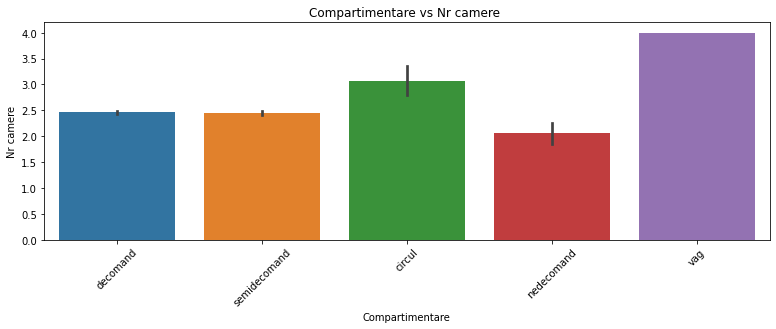

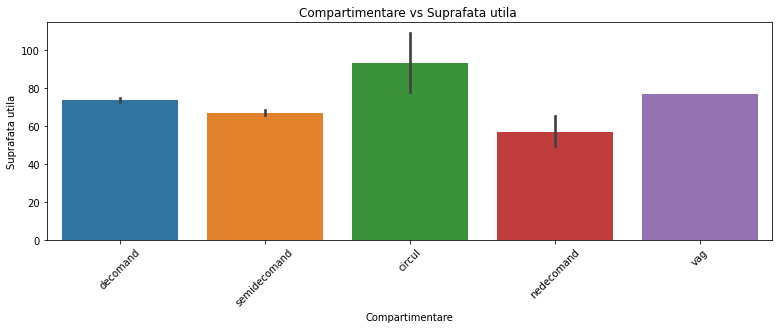

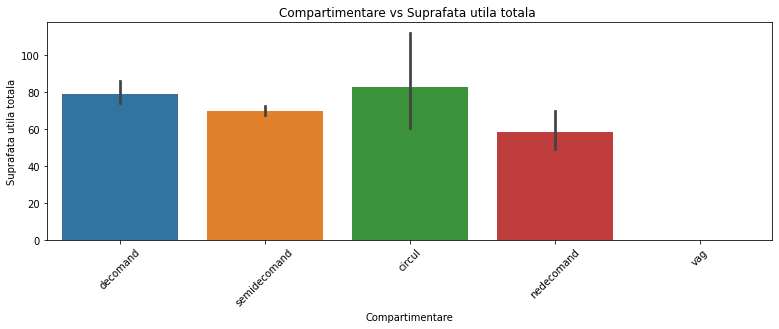

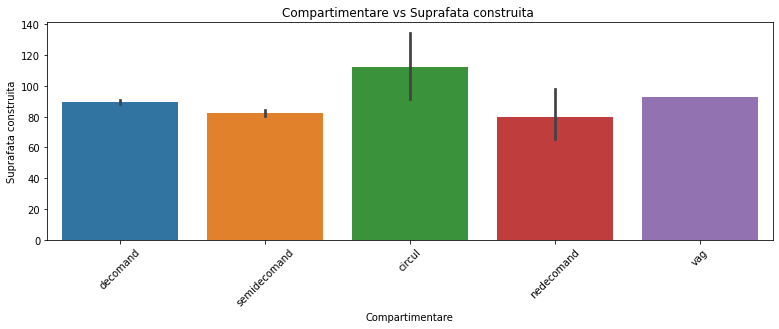

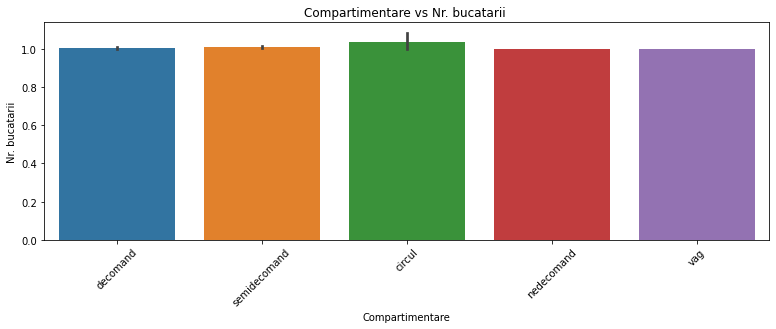

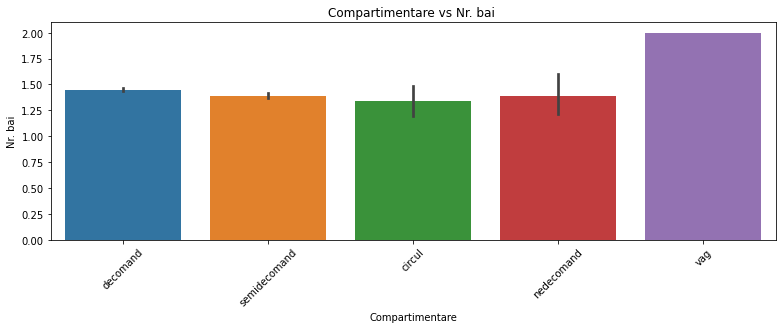

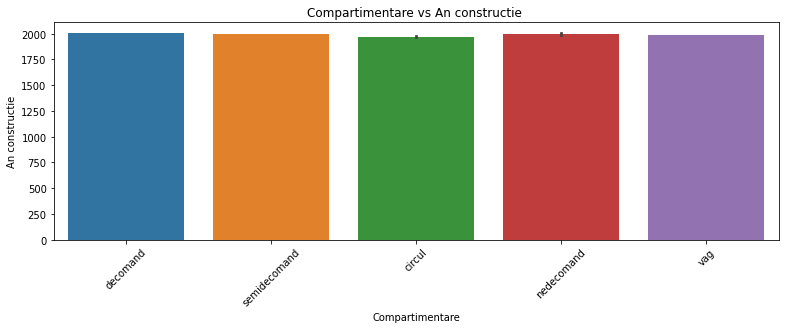

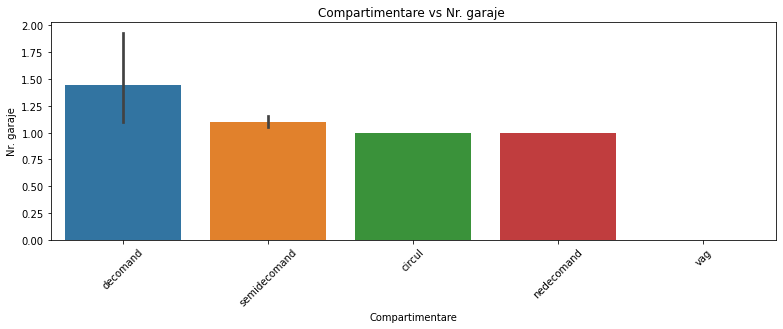

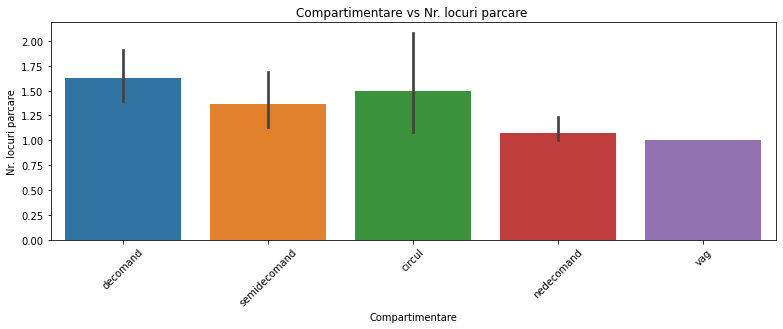

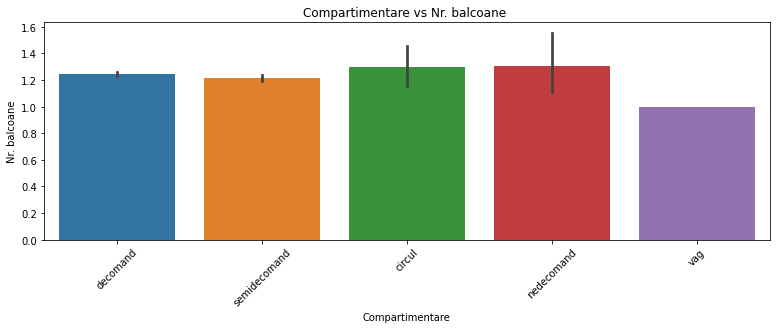

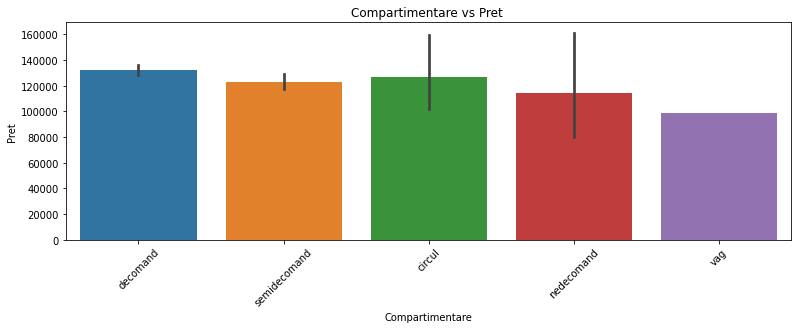

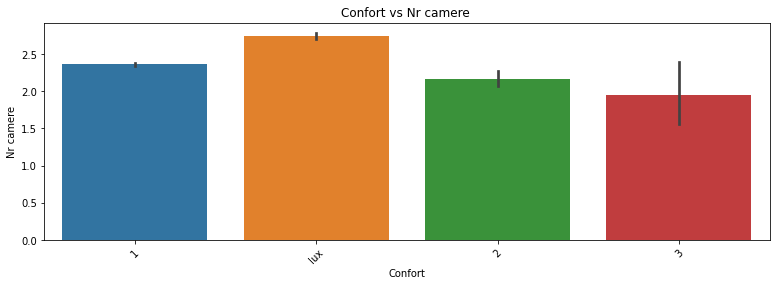

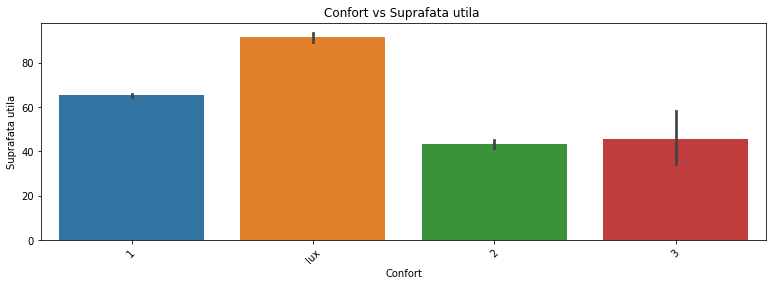

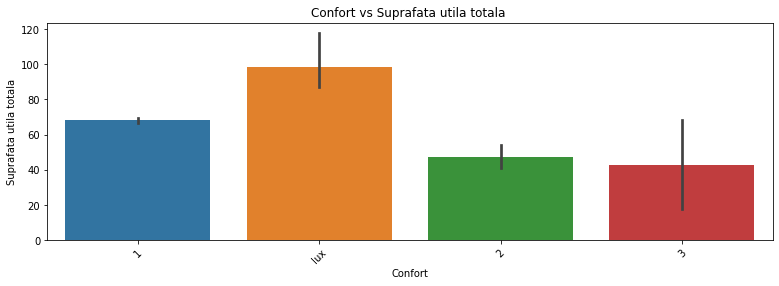

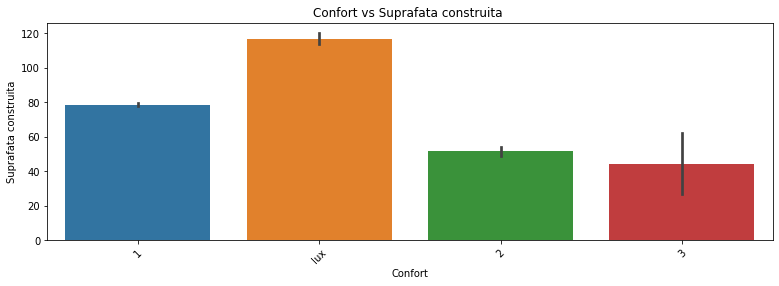

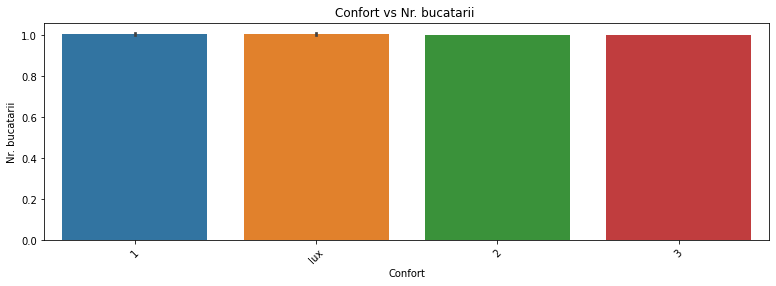

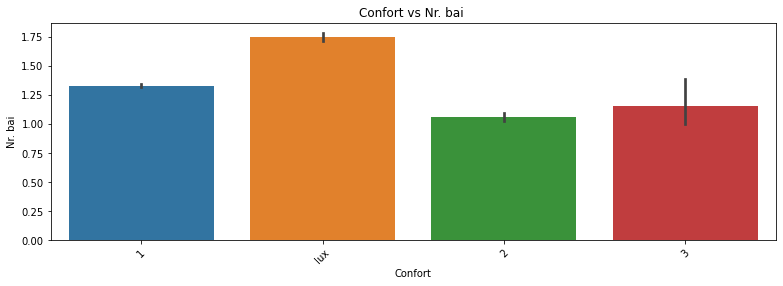

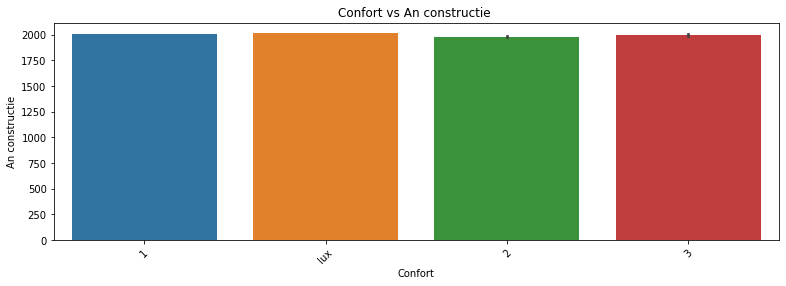

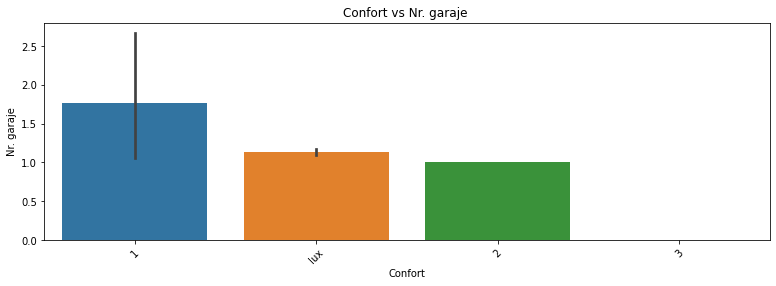

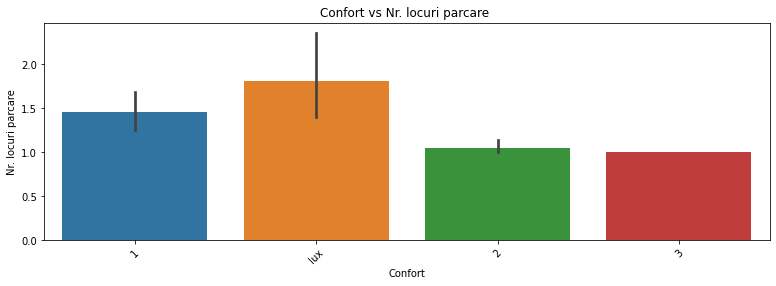

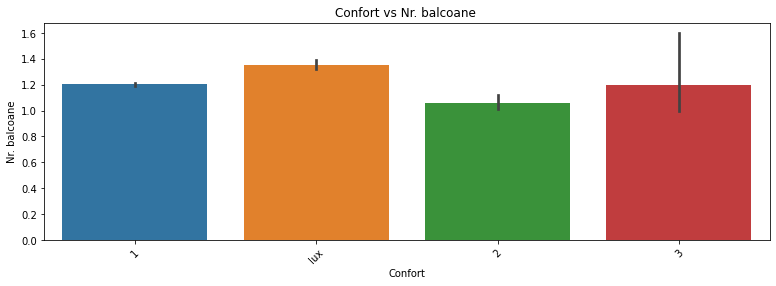

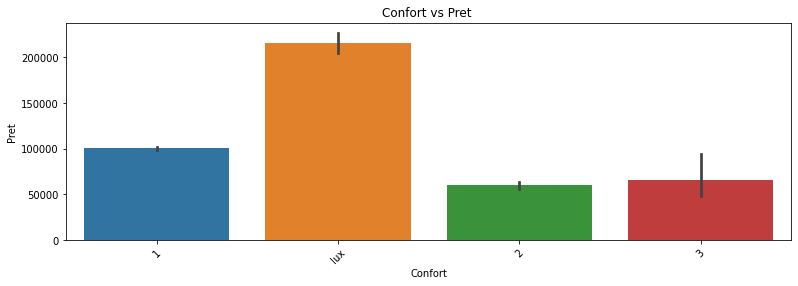

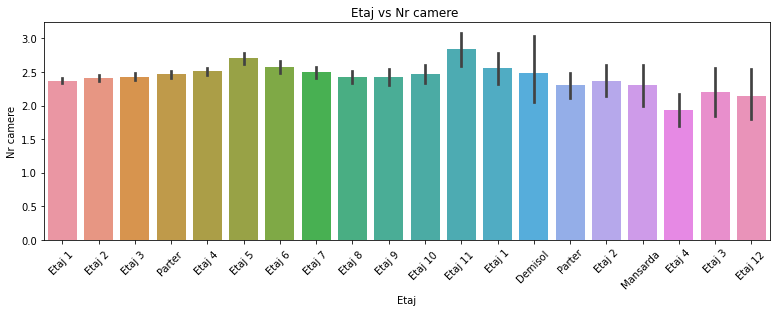

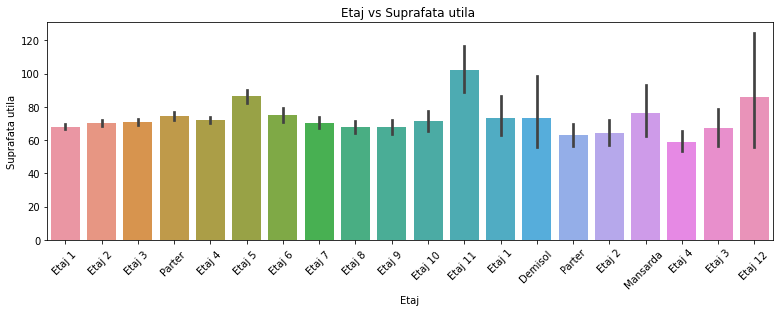

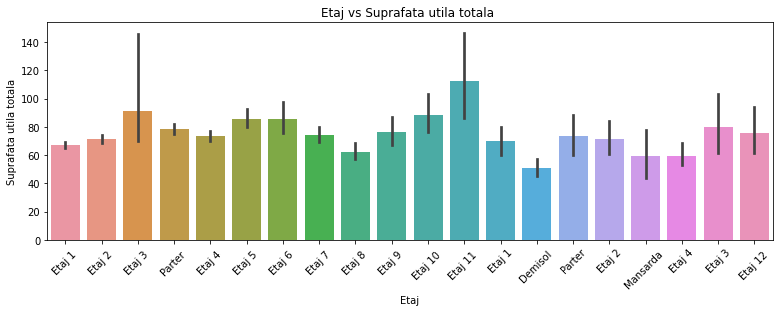

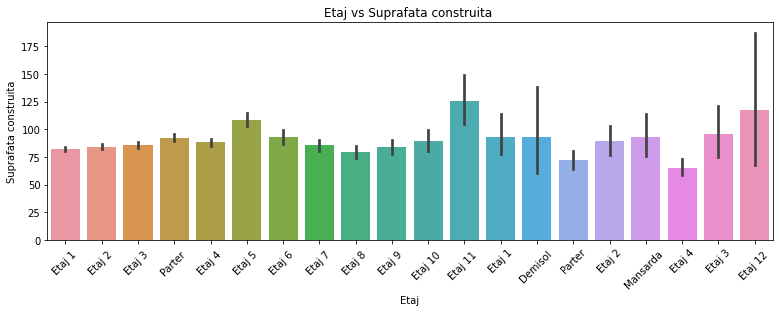

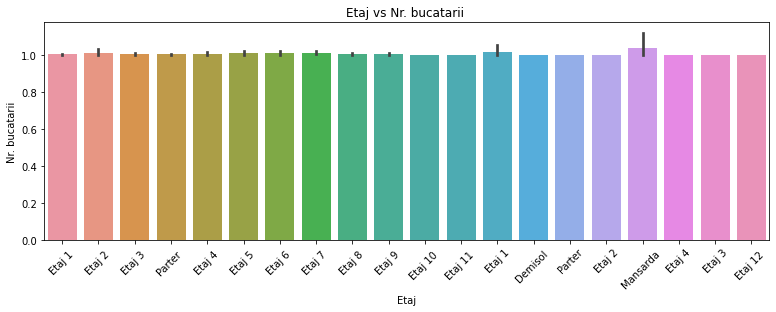

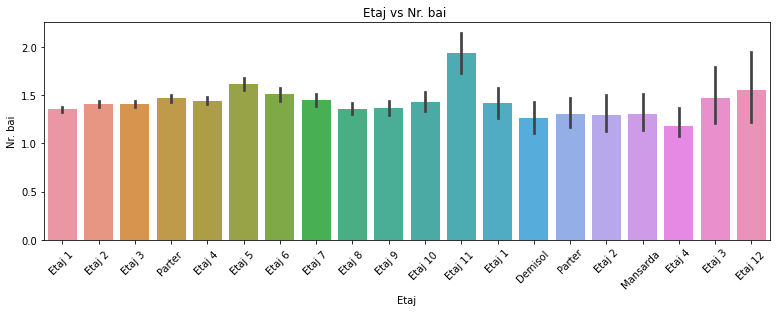

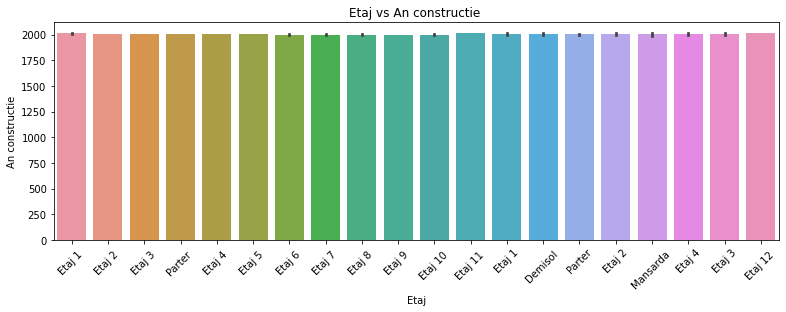

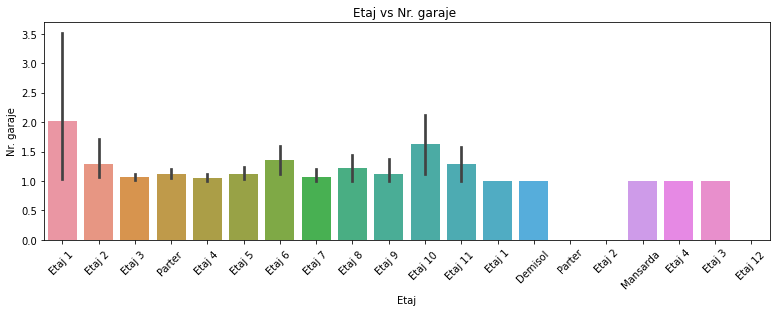

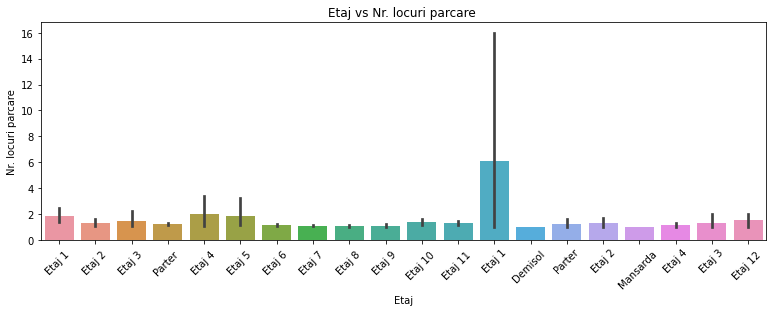

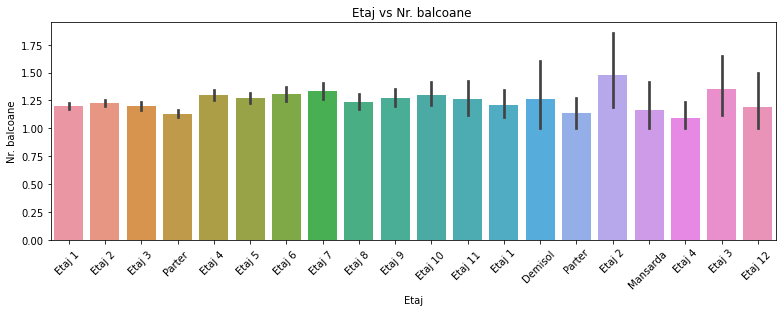

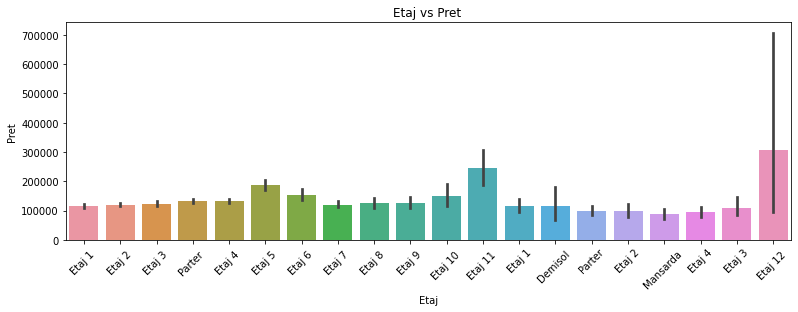

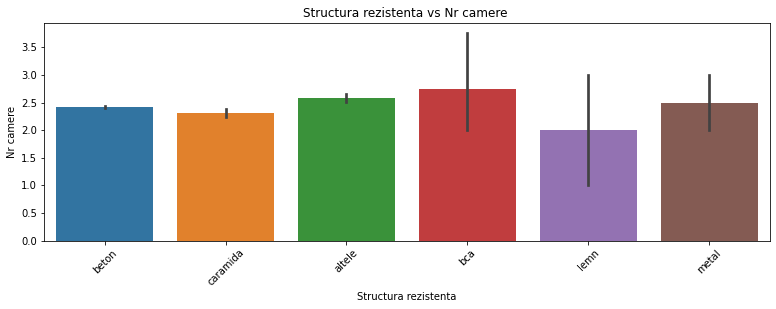

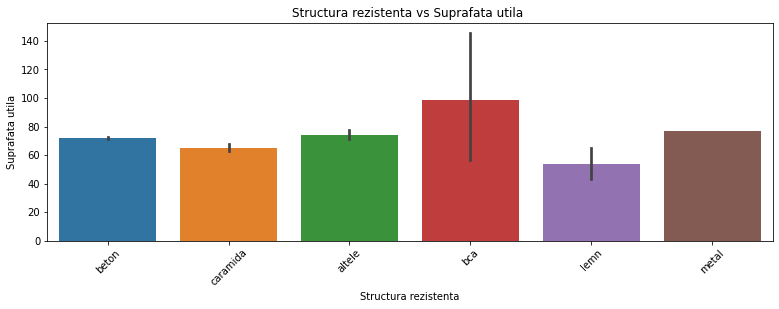

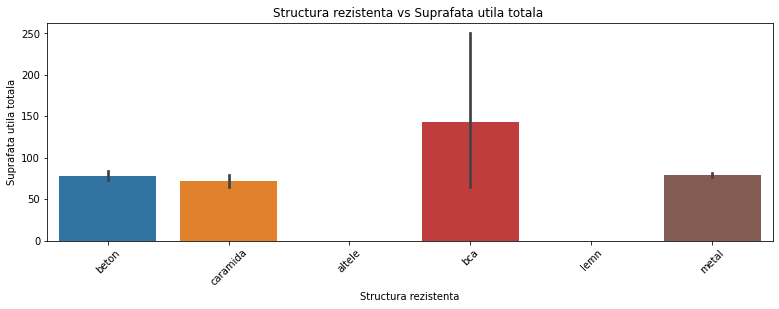

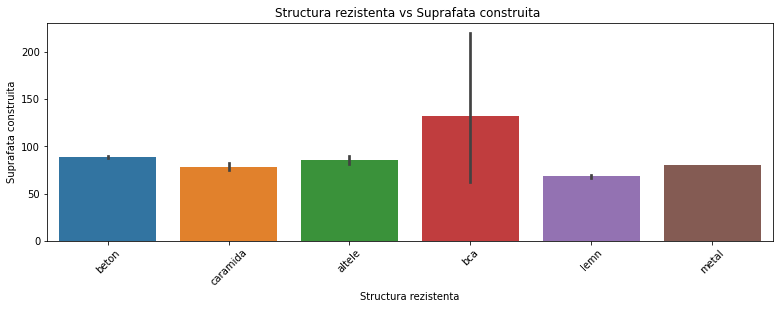

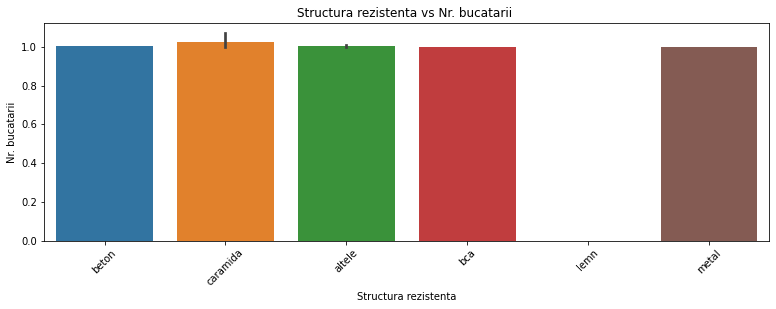

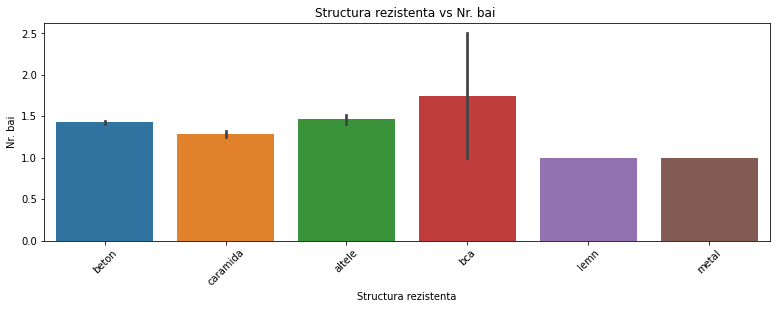

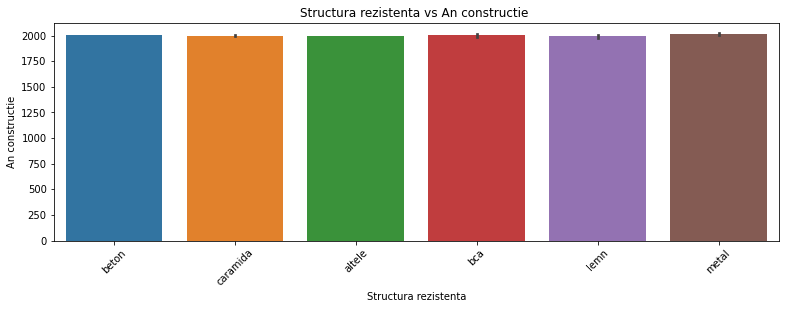

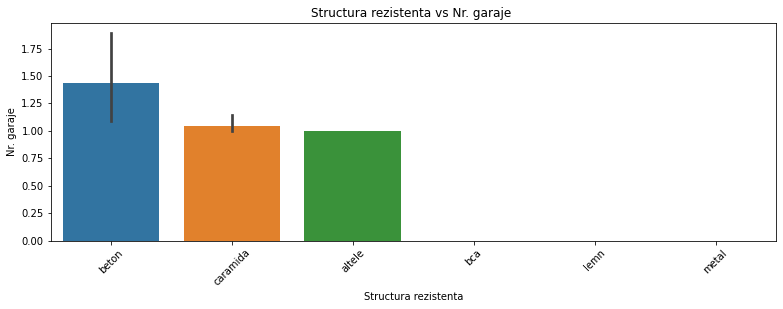

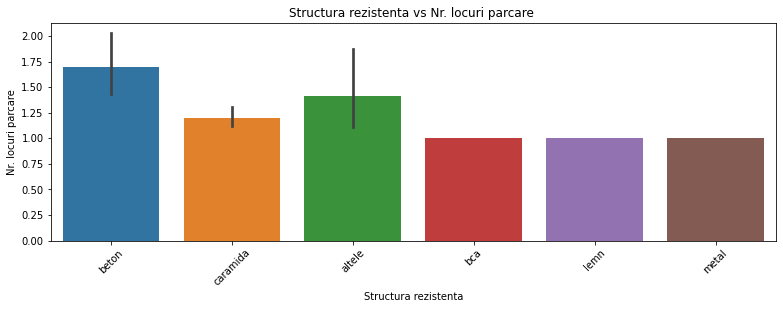

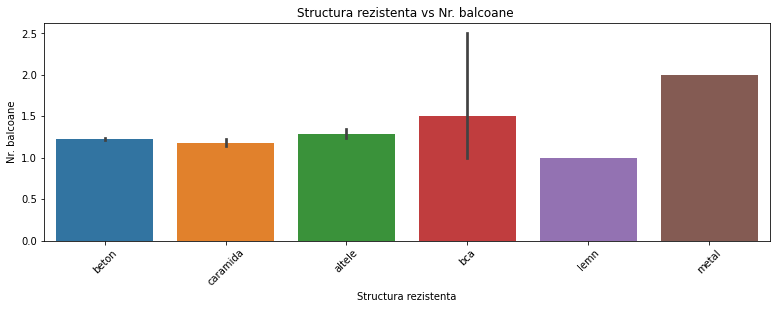

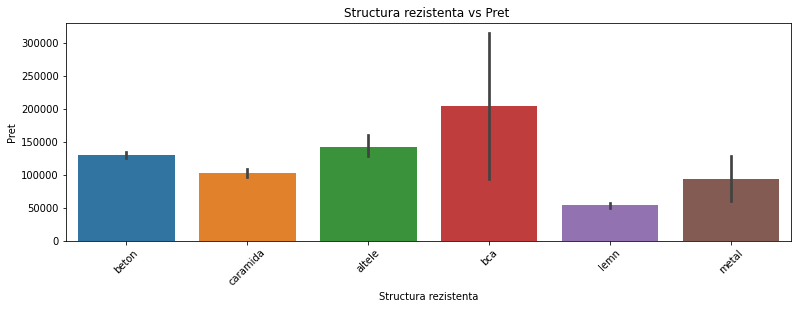

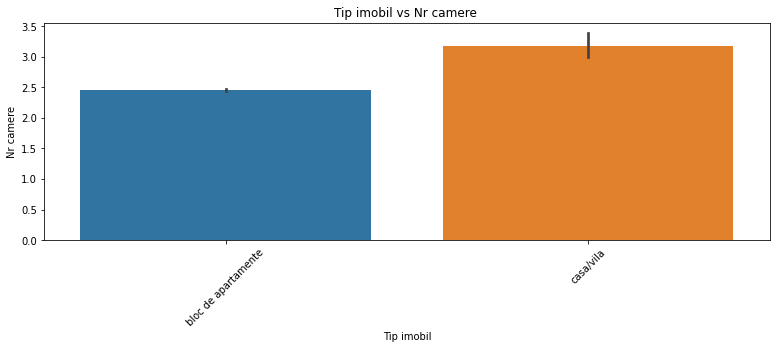

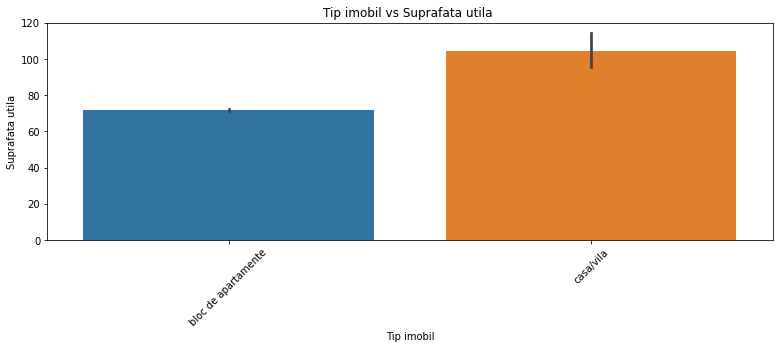

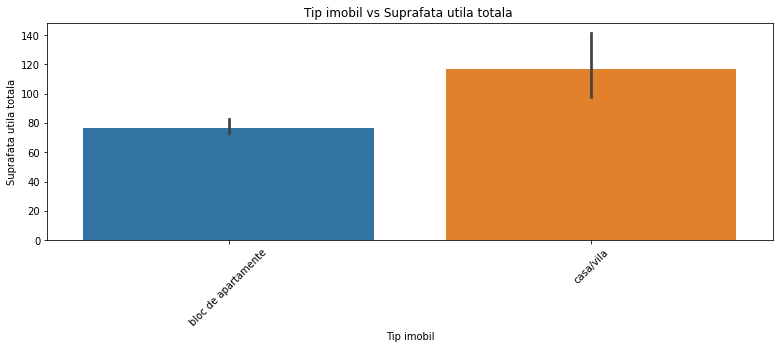

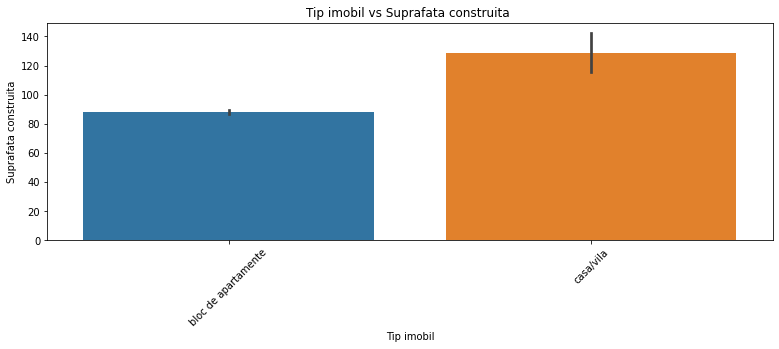

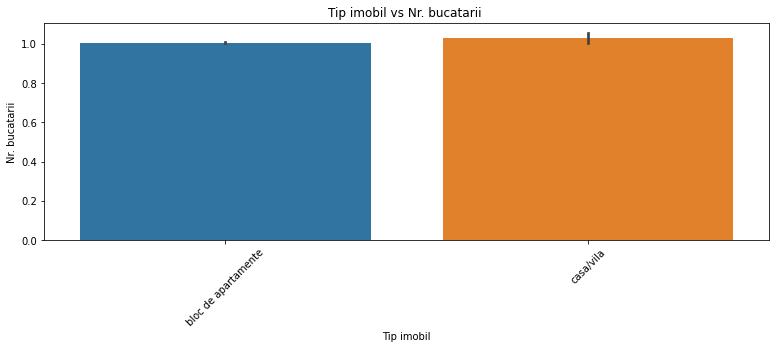

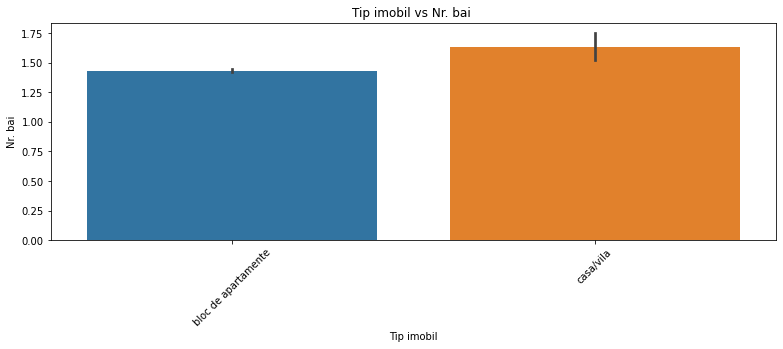

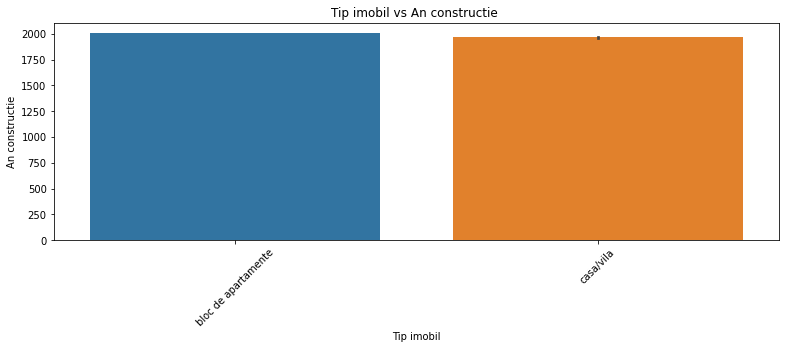

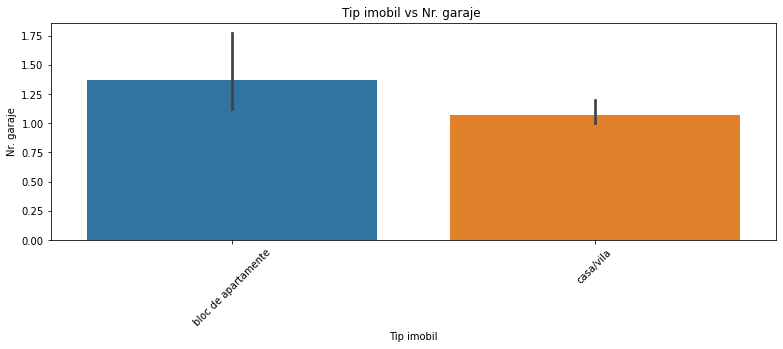

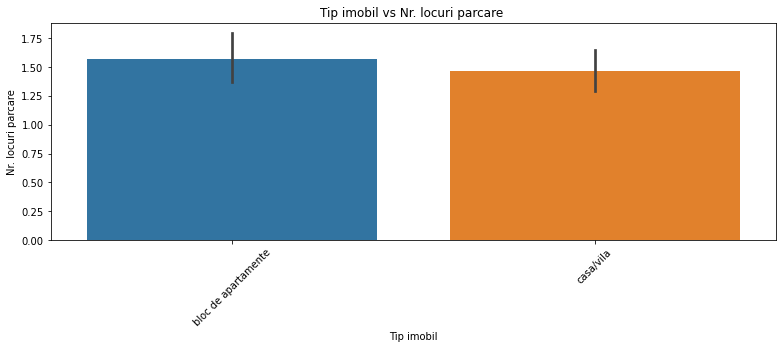

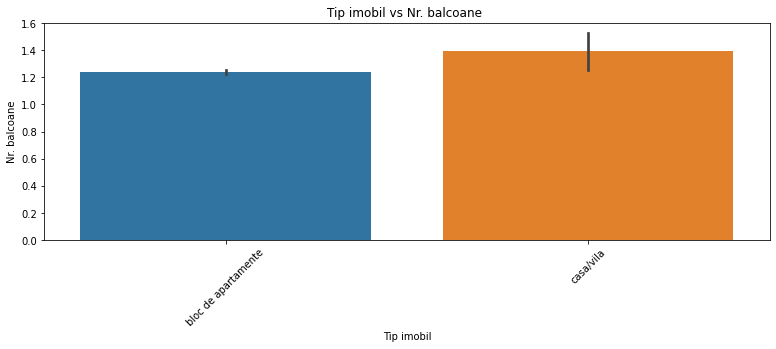

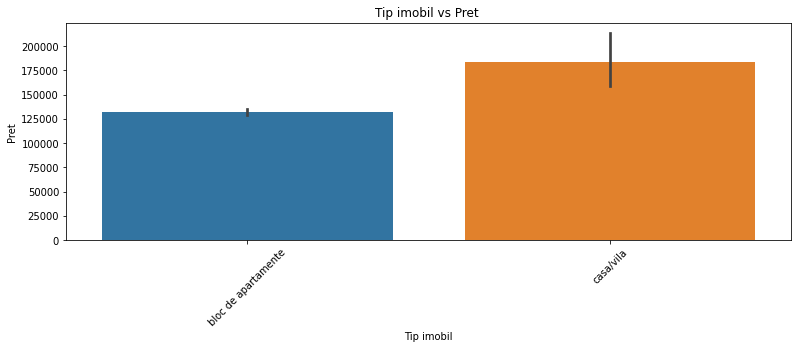

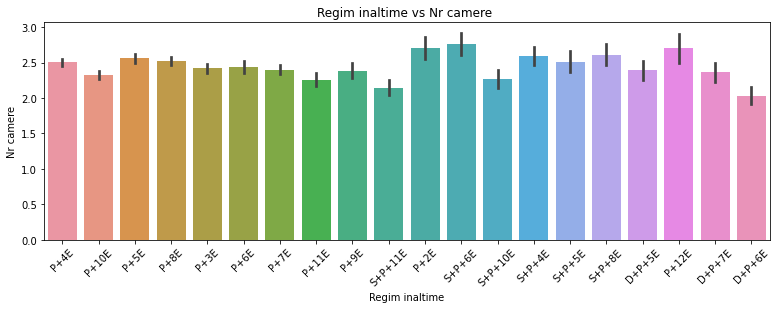

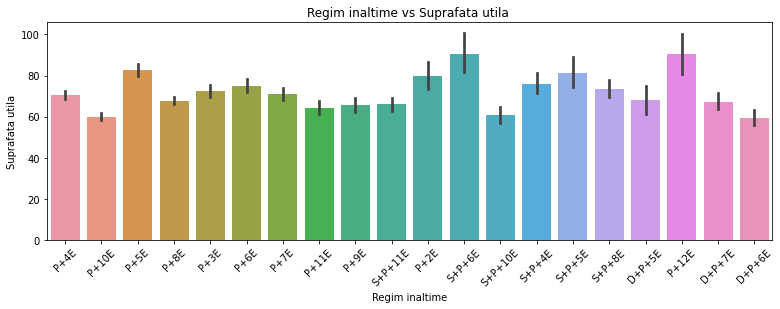

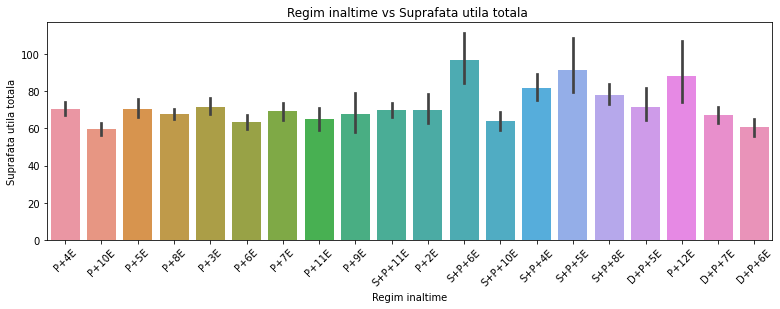

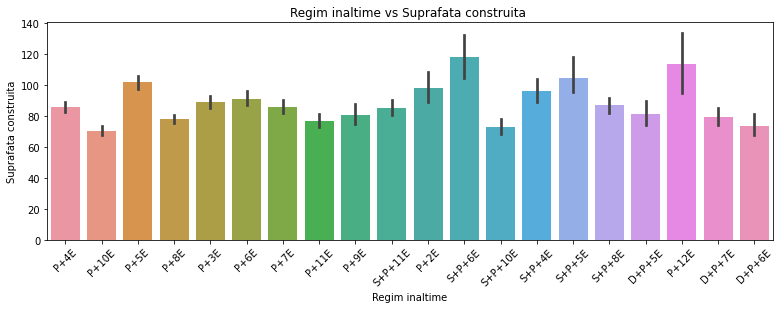

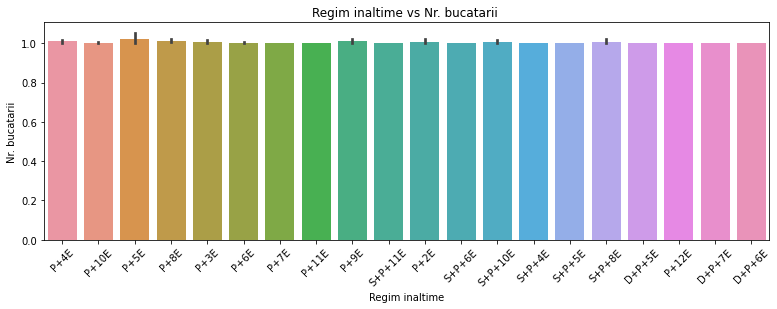

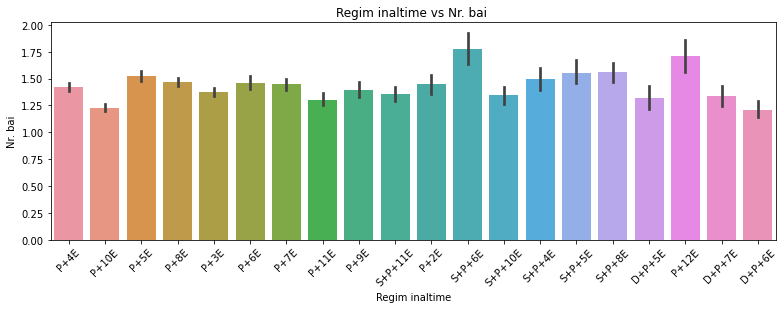

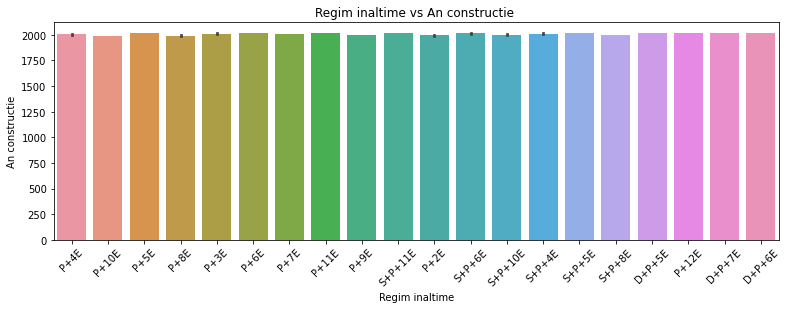

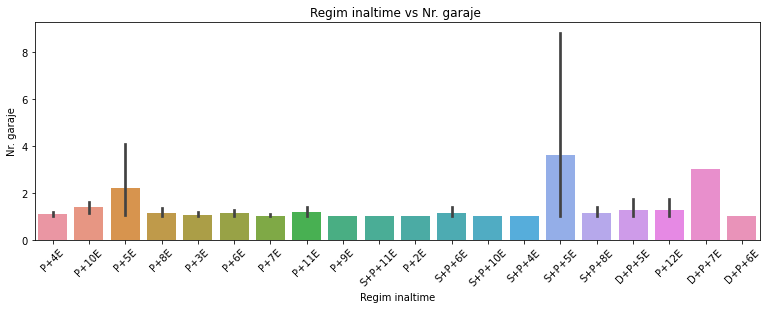

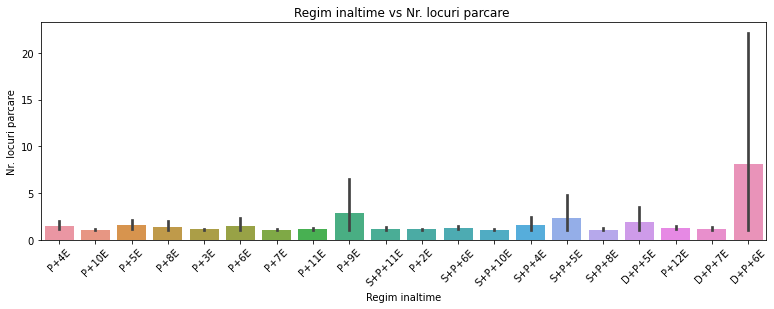

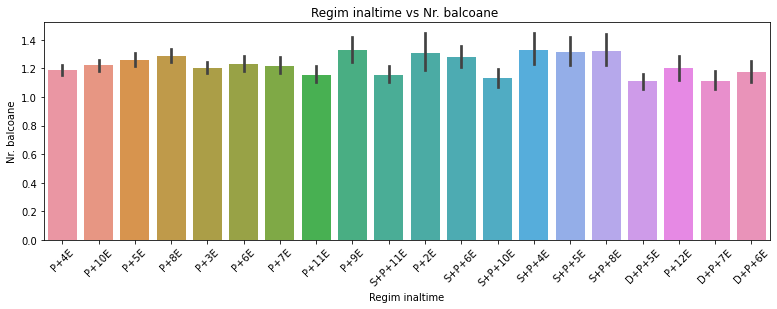

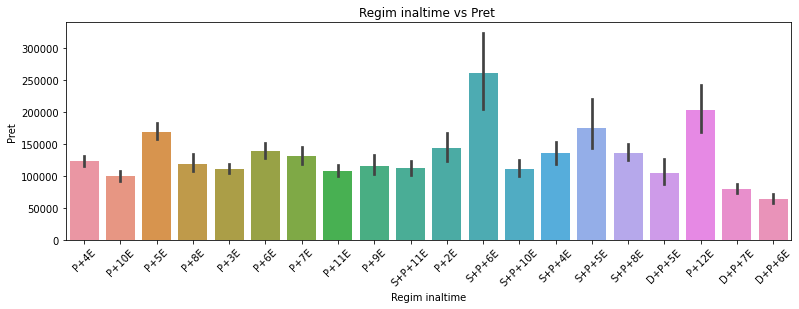

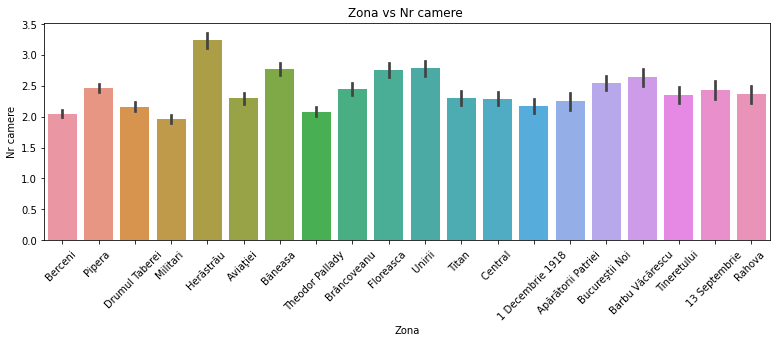

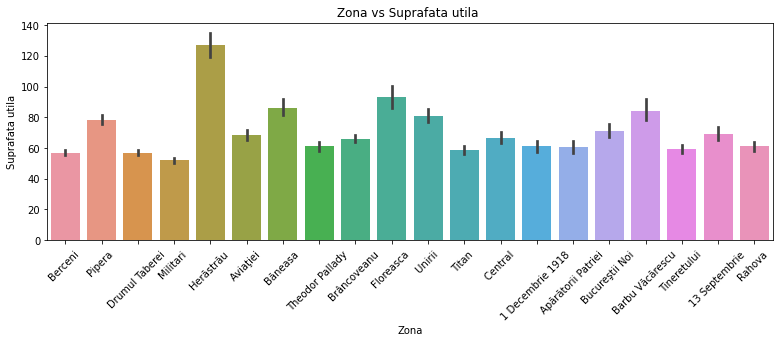

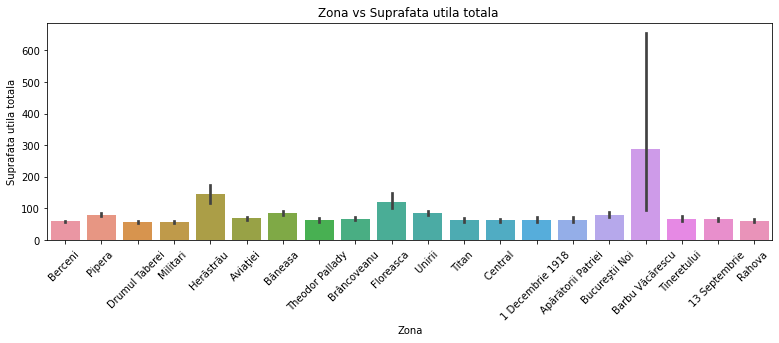

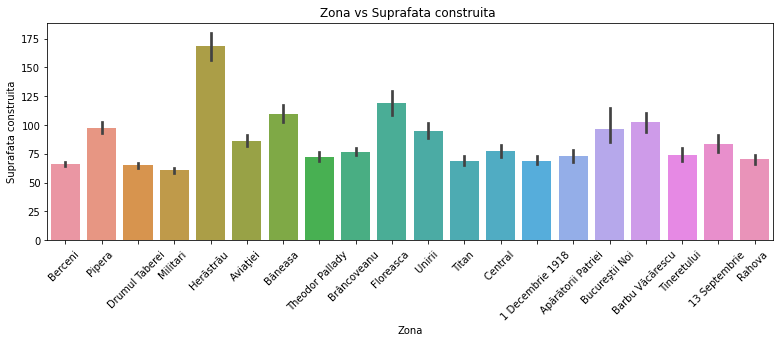

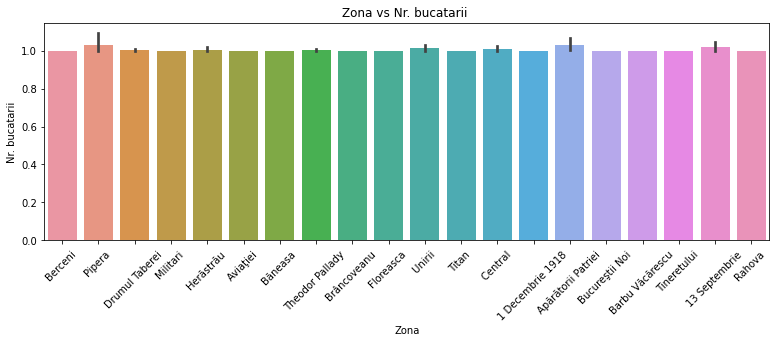

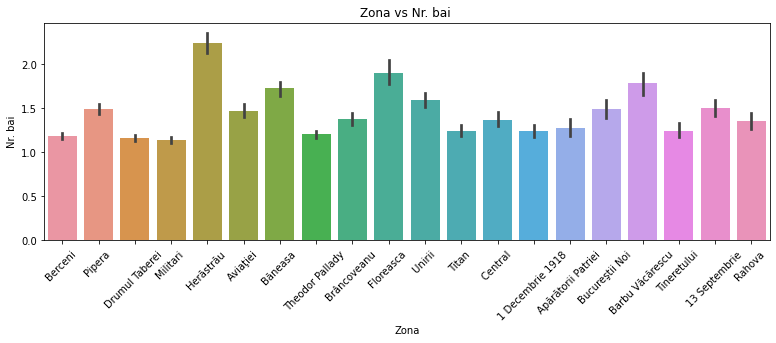

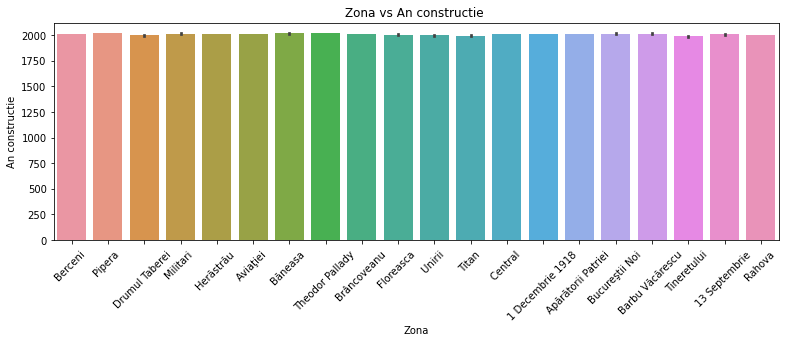

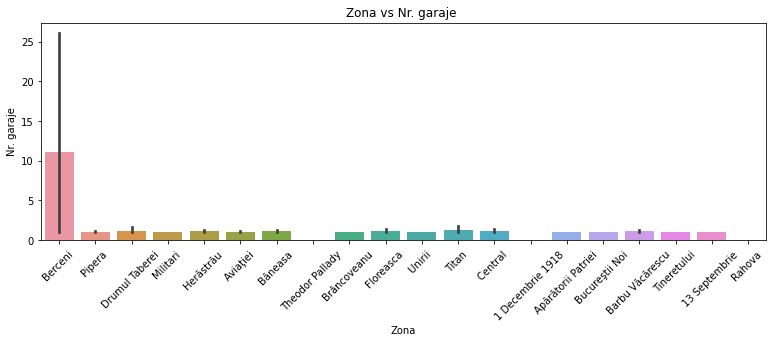

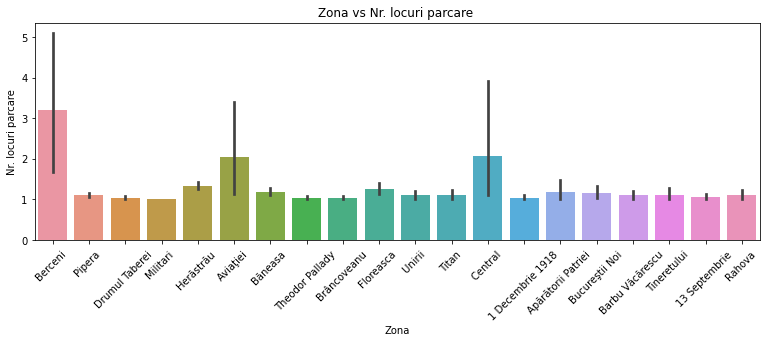

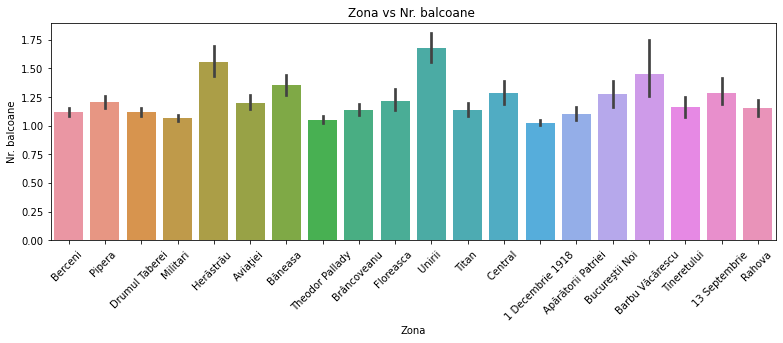

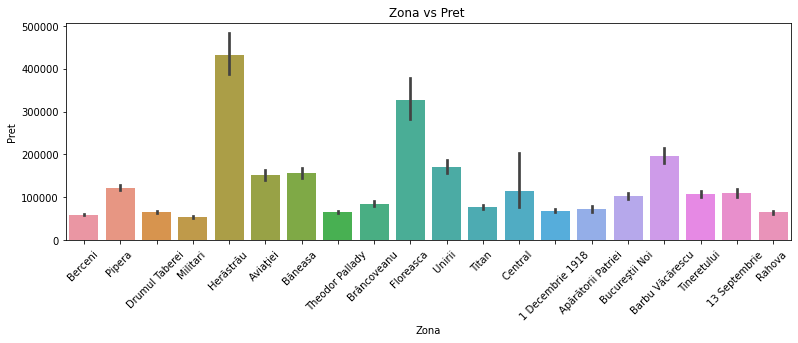

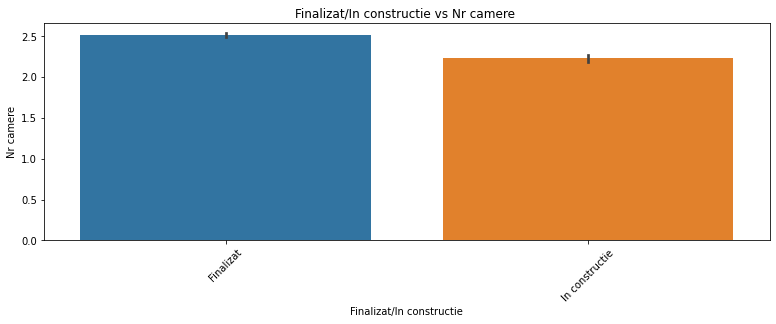

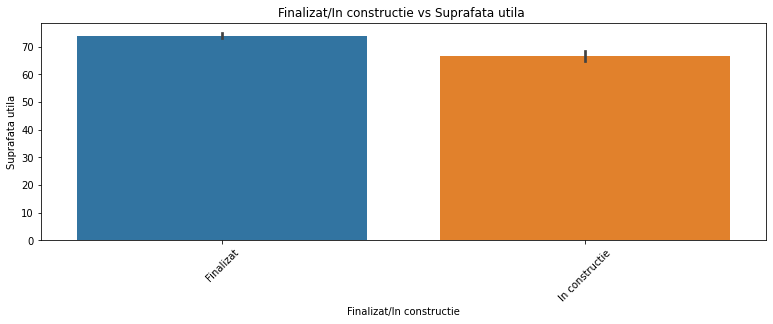

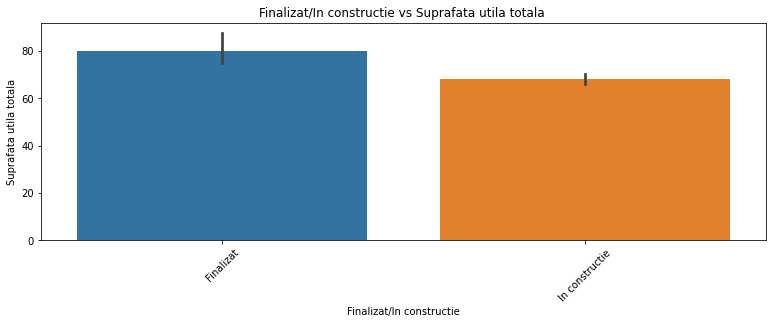

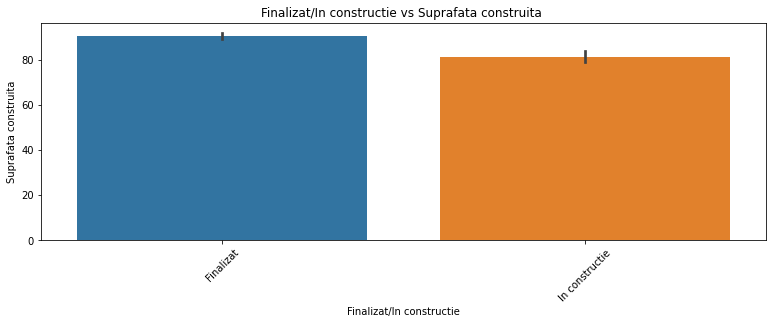

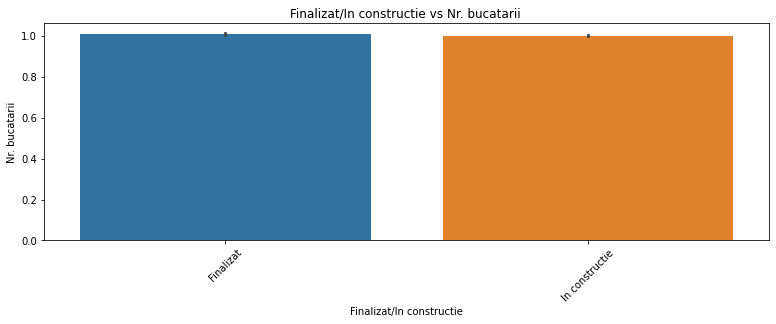

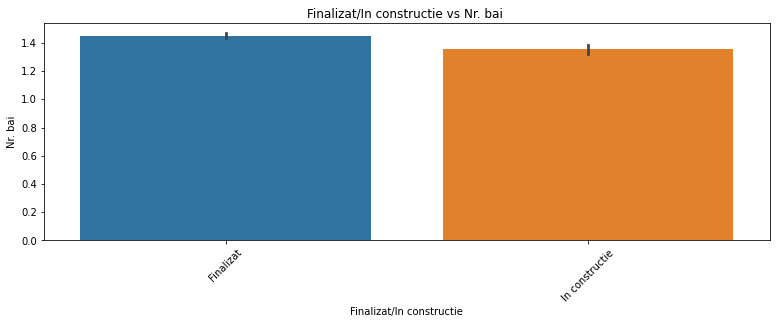

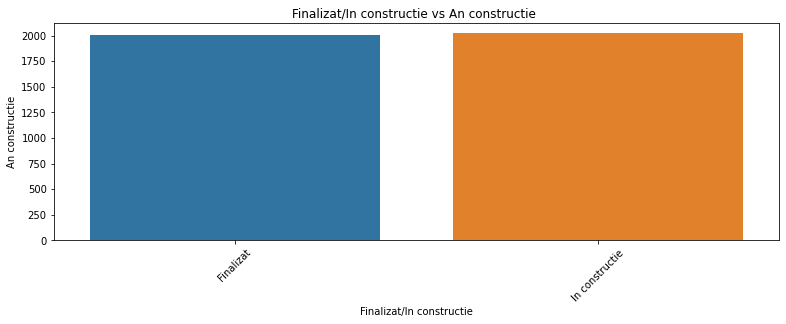

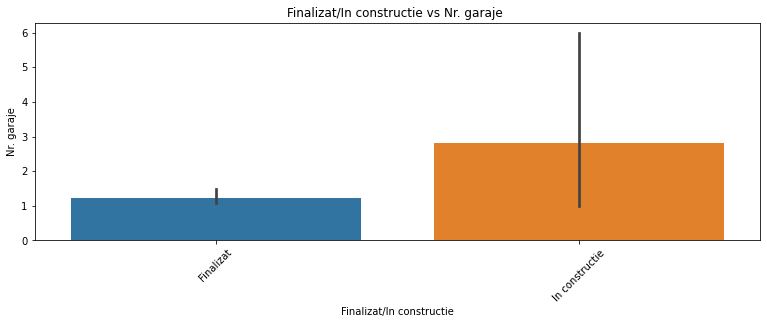

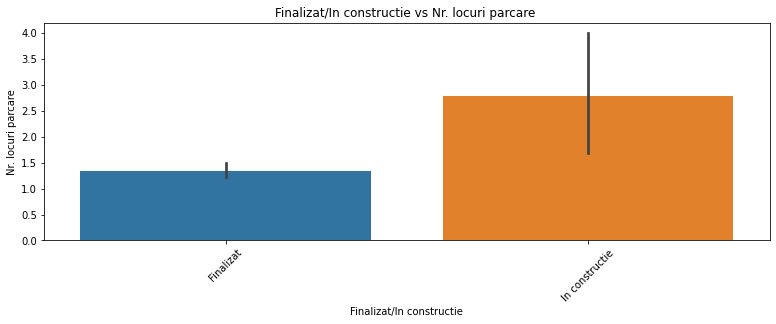

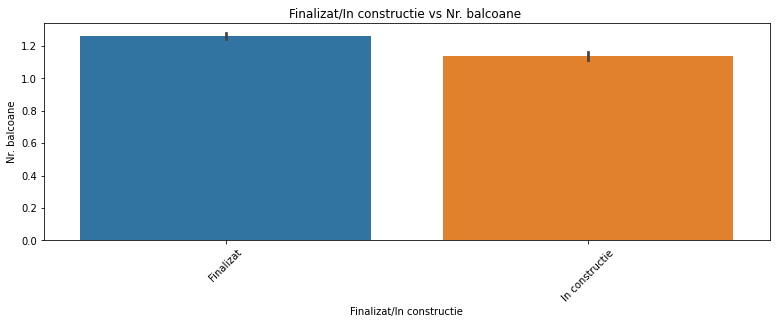

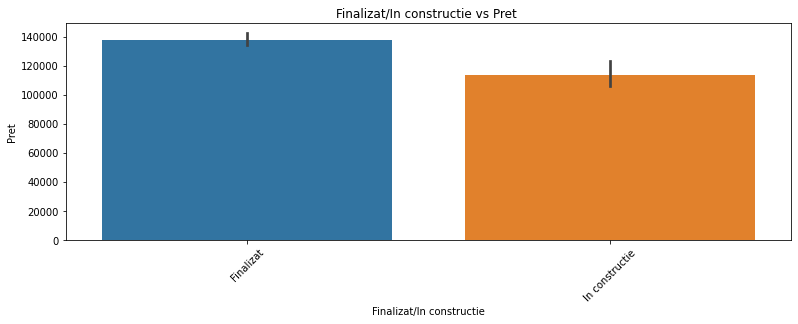

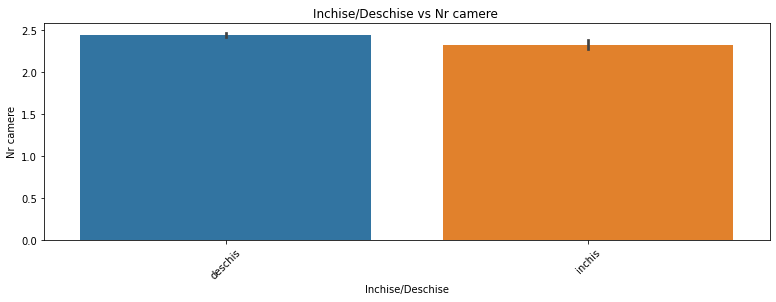

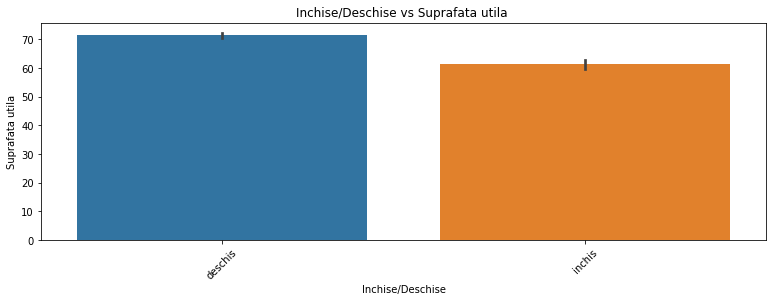

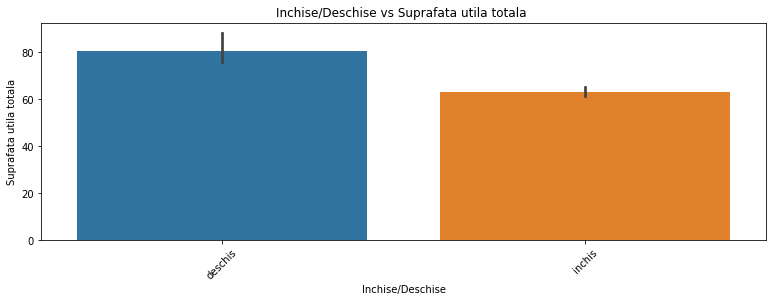

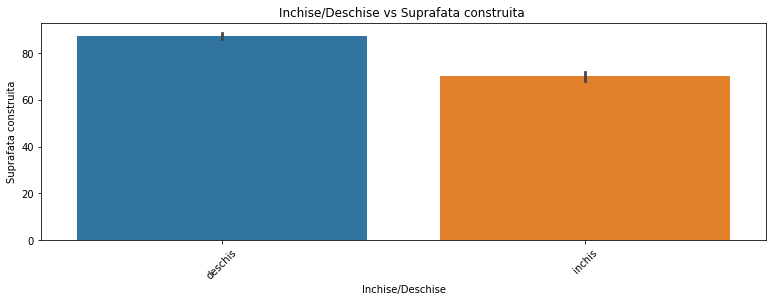

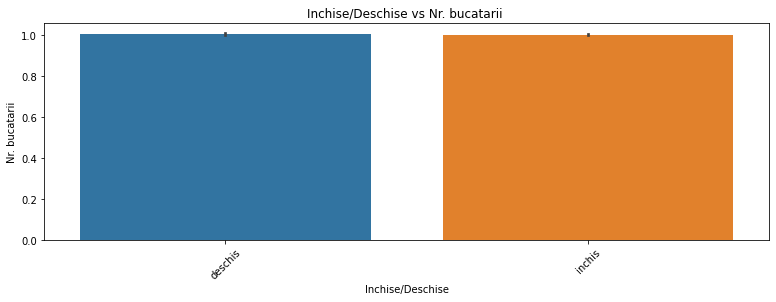

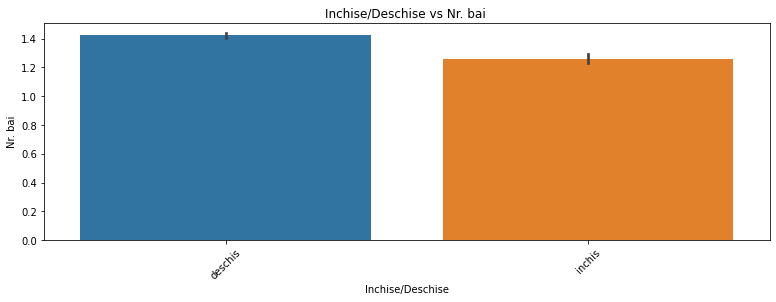

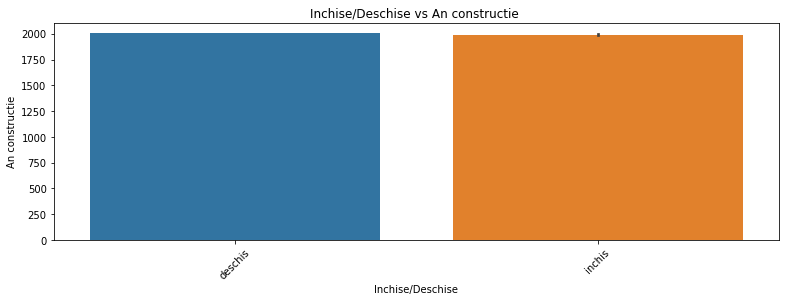

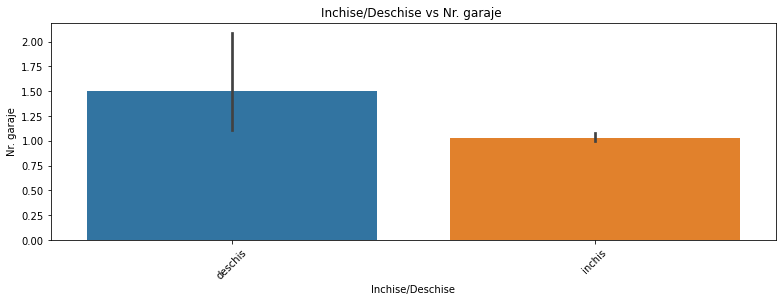

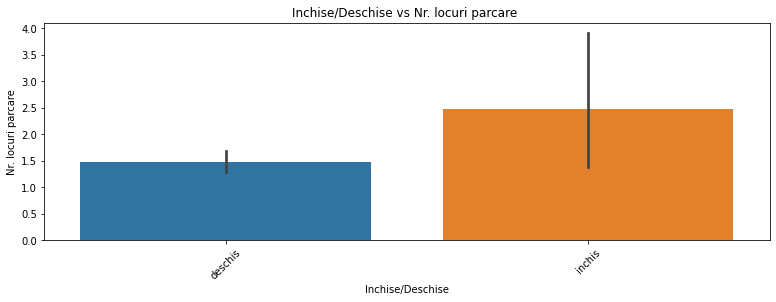

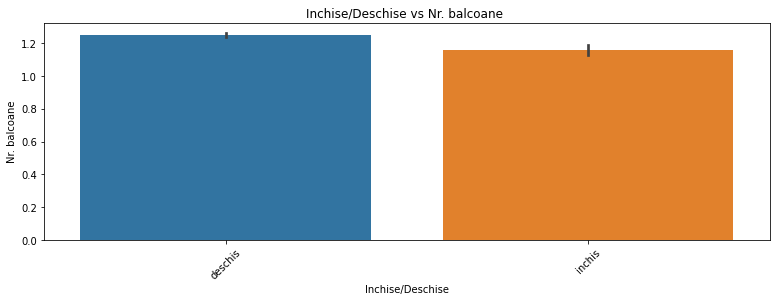

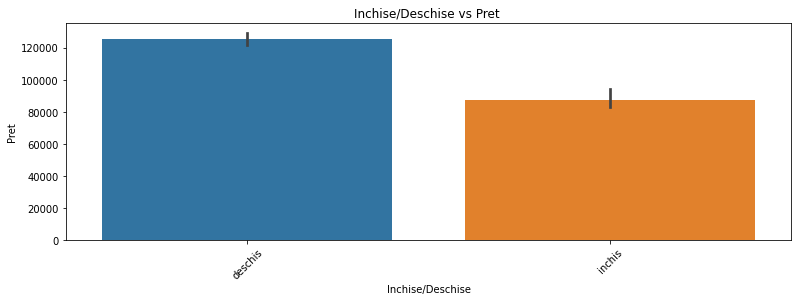

In [23]:
numerical_features = [feature for feature in df_copy.columns if df_copy[feature].dtype != 'object']
categorical_features = [feature for feature in df_copy.columns if df_copy[feature].dtype == 'object']

for feature in categorical_features:
    for feature2 in numerical_features:
        plt.figure(figsize=(13, 4))
        sns.barplot(x=df_copy[feature], y=df_copy[feature2], data=df_copy, order=df_copy[feature].value_counts().iloc[:20].index)
        plt.title('{0} vs {1} '.format(feature, feature2))
        plt.xticks(rotation=45)
        plt.show()

# Outliers

In [24]:
lst = ['Nr. bai', 'Nr. balcoane', 'Nr. bucatarii',]
    
def func(string):
    df_after_outliers = df_copy[df_copy[string] < 10] 
    return df_after_outliers[string]





# for item in lst:
#     sns.boxplot(func(item), fliersize=6)
#     plt.show()
    
    


# ***Missing Values Treatment***

As previously obseverd, the columns in our dataset contain values that are missing. They can reduce the power of our model which in turn leads to wrong predictions. So how do we treat the missing values? From previous analysis on missing data, it appears that the variables 'Nr. garaje', 'Suprafata utila totala', 'Nr. locuri parcare' contain aproximately 95 %, 65 %, respectively 75 % missing values. The choice I made was to drop these columns entirely as they have a very high number of missing values.


In [25]:
df_copy.drop('Nr. garaje', inplace=True, axis=1)
df_copy.drop('Suprafata utila totala', inplace=True, axis=1)
df_copy.drop('Nr. locuri parcare', inplace=True, axis=1)

## Method 1: fill with whatever value comes directly after 

In [26]:
df_copy_missing_1 = df_copy.copy()
df_copy_missing_1 = df_copy_missing_1.fillna(method = 'bfill', axis=0)
df_copy_missing_1['Structura rezistenta'].fillna('beton', inplace=True)

# ***Encoding Categorical Variables***

In [27]:
categorical_features = [feature for feature in df_copy_missing_1.columns if df_copy_missing_1[feature].dtype == 'object']

le = LabelEncoder()

for feature in categorical_features:
    df_copy_missing_1[feature] =  le.fit_transform(df_copy_missing_1[feature]) 

    

# def encode_and_bind(original_dataframe, feature_to_encode):
#     dummies = pd.get_dummies(original_dataframe[[feature_to_encode]])
#     res = pd.concat([original_dataframe, dummies], axis=1)
#     res = res.drop([feature_to_encode], axis=1)
#     return(res) 


# for feature in categorical_features:
#     df_copy_missing_1 = encode_and_bind(df_copy_missing_1, feature)  
    

In [28]:
df_copy_missing_1.head(10)

Nr camere  Suprafata utila  Suprafata construita  Compartimentare  Confort  \
0    3.00000        131.00000              65.00000                1        0   
1    2.00000         67.00000              65.00000                1        0   
2    2.00000         65.00000              65.00000                1        0   
3    1.00000         52.00000              68.00000                1        3   
4    4.00000        174.00000             207.00000                1        3   
5    5.00000        260.00000             300.00000                1        3   
6    3.00000        104.26000             173.00000                1        3   
7    2.00000         47.00000              53.00000                1        3   
8    3.00000         70.00000              72.00000                1        3   
9    1.00000         34.00000              38.00000                1        3   

   Etaj  Nr. bucatarii  Nr. bai  An constructie  Structura rezistenta  \
0    35        1.00000  1.00000      2020.00000                     2   
1    16        1.00000  1.00000      2020.00000                     2   
2     3        1.00000  1.00000      2020.00000                     2   
3     5        1.00000  1.00000      2016.00000                     2   
4    23        1.00000  3.00000      2021.00000                     2   
5    23        1.00000  3.00000      2021.00000                     2   
6    31        1.00000  2.00000      2020.00000                     2   
7    16        1.00000  1.00000      2021.00000                     2   
8    16        1.00000  2.00000      2021.00000                     2   
9     3        1.00000  1.00000      2021.00000                     2   

   Tip imobil  Regim inaltime  Nr. balcoane  Zona         Pret  \
0           0              50       2.00000    72  75600.00000   
1           0              48       2.00000    72  35800.00000   
2           0              50       1.00000    72  42400.00000   
3           0              79       1.00000    72  43500.00000   
4           0              15       1.00000   101 399888.00000   
5           0              15       2.00000   101 675000.00000   
6           0              81       2.00000   101 315000.00000   
7           0              13       1.00000   117  41000.00000   
8           0              48       1.00000   117  60000.00000   
9           0              48       1.00000   117  28000.00000   

   Finalizat/In constructie  Inchise/Deschise  
0                         0                 0  
1                         0                 0  
2                         0                 1  
3                         0                 1  
4                         1                 0  
5                         0                 0  
6                         0                 0  
7                         1                 0  
8                         1                 0  
9                         1                 0

# ***Linear Regression***

In [29]:
X = df_copy_missing_1.drop('Pret', inplace=False, axis=1)
y = df_copy_missing_1['Pret'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

regressor = LinearRegression(normalize=True)

regressor.fit(X_train, y_train)

y_pred = regressor.predict(X_test)

In [30]:
new_df = pd.DataFrame({'Predicted': y_pred,'Actual': y_test})
new_df

Predicted        Actual
0     107534.01072   64500.00000
1      63198.88533   89000.00000
2      27628.51551   49000.00000
3     279740.52442  209000.00000
4      38802.00046  150000.00000
5     163050.30261   65000.00000
6     127142.34453   78604.00000
7     105189.99289   82000.00000
8     217552.27976  140000.00000
9      19380.81130   62000.00000
10     62798.31095   40000.00000
11    157531.93733  225000.00000
12     75229.00181  101000.00000
13     84272.66064   66150.00000
14     92701.18183   78600.00000
15     89596.32643   56000.00000
16    111456.73502   63000.00000
17    -11703.74834   31000.00000
18     87070.78977   77000.00000
19    739096.70019  750000.00000
20    208486.48033  185000.00000
21    294487.66519  184990.00000
22     32635.99501   41500.00000
23     90946.34518   54900.00000
24     93946.89492   69000.00000
25    132934.73406   91997.00000
26     38608.08652   89100.00000
27     71996.18798   69900.00000
28    190665.02094  165000.00000
29    307654.54872   98000.00000
30     83051.50338   60092.00000
31     49922.11312   56000.00000
32    113071.74271  132000.00000
33     75702.53615  105000.00000
34    148726.92004  116000.00000
35    129527.41908   84000.00000
36     79195.22245   95000.00000
37    141350.10255  122000.00000
38    111406.44417   72400.00000
39     72665.71866   65900.00000
40     80149.19130   99900.00000
41     99230.96147   88500.00000
42     72727.47207   87927.00000
43     71862.11487   67000.00000
44     71629.53734   74500.00000
45    104132.91197  119025.00000
46    400227.79972  121060.00000
47    138488.36761  100000.00000
48     52841.36844   73000.00000
49    125695.58487  109774.00000
50     90127.82033   69000.00000
51     80981.86940  167000.00000
52    132937.40991  213601.00000
53     48217.31573   67000.00000
54     27839.27623   50000.00000
55    318401.01461  317000.00000
56    333368.56727  269000.00000
57     73277.59506   74900.00000
58    206224.32206  100000.00000
59     78793.11262   60500.00000
60     21263.08964   46000.00000
61     98147.49338   73000.00000
62     61897.07678   67000.00000
63    181392.69379  200000.00000
64     48895.88811   51400.00000
65    156552.37638  100000.00000
66    286843.75231  185000.00000
67    103249.79604   61000.00000
68     73167.45192   53900.00000
69     36568.03164   78000.00000
70     22064.61468   55000.00000
71     38975.31639   43000.00000
72     55777.93266   83000.00000
73    248864.90036  260000.00000
74    159158.83379   74500.00000
75    181134.27457  140000.00000
76     13519.02781   31000.00000
77     87654.84529   63000.00000
78    135846.72526  105000.00000
79    314757.49711  210000.00000
80     55304.66842   81500.00000
81    121405.99261  163000.00000
82     56620.26074   55900.00000
83    212709.50829  228000.00000
84     37626.77294   37900.00000
85    294675.94516  450000.00000
86    719922.08732  449000.00000
87    112224.77227   75000.00000
88     75490.01999   87000.00000
89     44604.97588   48000.00000
90     65687.01498   68000.00000
91     30743.07704   76990.00000
92     52120.99648   40000.00000
93    332703.12984  145000.00000
94    131978.47398   80636.00000
95    251715.06206  240000.00000
96     79002.55503  105000.00000
97      6430.37881   58999.00000
98    204302.59042  215000.00000
99    120189.51369   57900.00000
100   299627.81961  330000.00000
101    29164.38539   99500.00000
102   177477.66121  110000.00000
103   102297.85273   72000.00000
104    75770.63694   70900.00000
105    37342.24364   44748.00000
106   133634.55795  122900.00000
107   420629.17015  209900.00000
108   278038.17156  235300.00000
109   111941.36153  106500.00000
110   107393.74901   85000.00000
111    61688.95442   59500.00000
112   158211.76717  216000.00000
113   488930.99623  700000.00000
114     9729.27184   39900.00000
115   132679.10696   65000.00000
116    93465.25122   75144.00000
117   109399.46860  165000.00000
118   507518.22857  400000.00000
119    71699.49557   60999.00000
120    76979.416

In [31]:
test_set_rmse = (np.sqrt(mean_squared_error(y_test, y_pred)))
test_set_r2 = r2_score(y_test, y_pred)
test_set_adj_r2 = 1-(1-r2_score(y_test, y_pred))*((len(X_test)-1)/(len(X_test)-len(X_test.columns)-1))


print('Root square mean error is: {}'.format(test_set_rmse))
print('R square is: {}'.format(test_set_r2))
print('R square adjusted is: {}'.format(test_set_adj_r2))

Root square mean error is: 94290.39194375026
R square is: 0.6894856549111776
R square adjusted is: 0.6869764480821771
